In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import glob
import os

def newDataReader(datapath):
    
    with open(datapath, 'r') as file:
        lines = file.readlines()

    data_blocks = []  # to store individual data blocks of 1000 lines each

    i = 0
    while i < len(lines):
        line = lines[i].strip()
        if '----' in line:
            i += 1
            continue
        else:
            start = i
            # Find the end of this block (either another dash line or end of file)
            while i < len(lines) and '----' not in lines[i]:
                i += 1
            end = i
            
            block = lines[start:end]
            data = [list(map(float, item.split(','))) for item in block if ',' in item]  # convert string to list of floats
            
            # Check the length of data, adjust and log if necessary
            if len(data) < 1000:
                padding = [[0.0] * 9 for _ in range(1000 - len(data))]
                data.extend(padding)
                # print(f"Data block starting at line {start} has less than 1000 lines. Padding with zeros.")
            elif len(data) > 1000:
                data = data[:1000]
                # print(f"Data block starting at line {start} has more than 1000 lines. Truncating to 1000.")
            
            data_blocks.append(data)

    # Convert list of data blocks into a 3D numpy array
    datasets_array = np.array(data_blocks)
    
    return datasets_array


Healthy_dataset = []  # to accumulate datasets from all matching files

healthy_location = '../../ML_Training/collected_data/Healthy2/*'
for filename in glob.glob(healthy_location):
    data = newDataReader(filename)
    Healthy_dataset.append(data)
    
# Concatenate all datasets from different files
Healthy = np.concatenate(Healthy_dataset, axis=0)
Healthy = np.transpose(Healthy, (2, 0, 1))
healthy_df = pd.DataFrame(Healthy.reshape(Healthy.shape[0], -1))
healthy_df = healthy_df.T

Alternate_dataset = []  # to accumulate datasets from all matching files

Alternate_location = '../../ML_Training/collected_data/Cavitation2/*'

for filename in glob.glob(Alternate_location):
    data = newDataReader(filename)
    Alternate_dataset.append(data)

# Concatenate all datasets from different files
Alternate = np.concatenate(Alternate_dataset, axis=0)
Alternate = np.transpose(Alternate, (2, 0, 1))
alternate_df = pd.DataFrame(Alternate.reshape(Alternate.shape[0], -1))
alternate_df = alternate_df.T

In [4]:
print(healthy_df.shape)
print(alternate_df.shape)

healthy2_vert_df = healthy_df.iloc[:, :3]
cavitation_vert_df = alternate_df.iloc[:, :3]

print(healthy2_vert_df.shape)
print(cavitation_vert_df.shape)


(39839000, 9)
(8764000, 9)
(39839000, 3)
(8764000, 3)


In [5]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import glob
import os

# Selecting the relevant data

vibe_col = [1,2,3]
healthy_vert = 'C:/Users/jared/OneDrive - National University of Singapore/Y2/S2/EG3301R/DataCollection/healthy/second-batch-27-3-2023-cleaned/vertical-cleaned/OneKhz2023-03-24t0*.csv'
healthy_hori = 'C:/Users/jared/OneDrive - National University of Singapore/Y2/S2/EG3301R/DataCollection/healthy/second-batch-27-3-2023-cleaned/horizontal-cleaned/OneKhz2023-03-24t0*.csv'
unhealthy_vert = 'C:/Users/jared/OneDrive - National University of Singapore/Y2/S2/EG3301R/DataCollection/unhealthy/loose-base/first-batch-22-3-2023/vibration/vertical-cleaned/OneKhz2023-03-23t0*.csv'
unhealthy_hori = 'C:/Users/jared/OneDrive - National University of Singapore/Y2/S2/EG3301R/DataCollection/unhealthy/loose-base/first-batch-22-3-2023/vibration/horizontal-cleaned/OneKhz2023-03-23t0*.csv'

# Loading the data
def dataReader(datapath):
    data_n = pd.DataFrame()
    for file in glob.glob(datapath):
        df = pd.read_csv(file, usecols=['x', 'y', 'z'])

        data_n = pd.concat([data_n, df], axis=0)
        # print("done with file: " + file)

    return data_n

data_healthy_vert = dataReader(healthy_vert)
data_healthy_hori = dataReader(healthy_hori)
data_unhealthy_vert = dataReader(unhealthy_vert)
data_unhealthy_hori = dataReader(unhealthy_hori)

print("starting size: ")
print(data_healthy_vert.shape)
print(data_healthy_hori.shape)
print(data_unhealthy_vert.shape)
print(data_unhealthy_hori.shape)


starting size: 
(4917380, 3)
(4900690, 3)
(4940044, 3)
(4943184, 3)


In [6]:
unseen_healthy_vert = 'C:/Users/jared/OneDrive - National University of Singapore/Y2/S2/EG3301R/DataCollection/healthy/second-batch-27-3-2023-cleaned/vertical-cleaned/OneKhz2023-03-23t*.csv'
unseen_healthy_hori = 'C:/Users/jared/OneDrive - National University of Singapore/Y2/S2/EG3301R/DataCollection/healthy/second-batch-27-3-2023-cleaned/horizontal-cleaned/OneKhz2023-03-23t*.csv'

data_unseen_healthy_vert = dataReader(unseen_healthy_vert)
data_unseen_healthy_hori = dataReader(unseen_healthy_hori)

In [7]:
print(data_unseen_healthy_vert.shape)
print(data_unseen_healthy_hori.shape)

data_unseen_healthy_vert_cut = data_unseen_healthy_vert[:1737000]
data_unseen_healthy_hori_cut = data_unseen_healthy_hori[:1737000]

print(data_unseen_healthy_vert_cut.shape)
print(data_unseen_healthy_hori_cut.shape)

(1738612, 3)
(1737760, 3)
(1737000, 3)
(1737000, 3)


In [8]:
# Cut all data to 250000 rows
data_healthy_vert_cut = data_healthy_vert[:4900000]
data_healthy_hori_cut = data_healthy_hori[:4900000]
data_unhealthy_vert_cut = data_unhealthy_vert[:4900000]
data_unhealthy_hori_cut = data_unhealthy_hori[:4900000]

data_healthy2_vert_cut = healthy2_vert_df[:4900000]
data_cavitation_vert_cut = cavitation_vert_df[:4900000]


print("Cut size: ")
print(data_healthy_vert_cut.shape)
print(data_healthy_hori_cut.shape)
print(data_unhealthy_vert_cut.shape)
print(data_unhealthy_hori_cut.shape)
print(data_healthy2_vert_cut.shape)
print(data_cavitation_vert_cut.shape)


Cut size: 
(4900000, 3)
(4900000, 3)
(4900000, 3)
(4900000, 3)
(4900000, 3)
(4900000, 3)


In [11]:
import numpy as np
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import RobustScaler
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt

data_healthy_vert_array = []
data_healthy_hori_array = []
data_unhealthy_vert_array = []
data_unhealthy_hori_array = []

def dataToArray(data):
    signalX = data.iloc[:, 0]
    signalY = data.iloc[:, 1]
    signalZ = data.iloc[:, 2]
    signal = np.array([signalX, signalY, signalZ])
    return signal

# First set of healthy data
data_healthy_vert_array = np.array(dataToArray(data_healthy_vert_cut))
data_healthy_hori_array = np.array(dataToArray(data_healthy_hori_cut))

# First set of unhealthy data (Loose base 1 day)
data_unhealthy_vert_array = np.array(dataToArray(data_unhealthy_vert_cut))
data_unhealthy_hori_array = np.array(dataToArray(data_unhealthy_hori_cut))

# Second set of healthy data (1 week, after cavitation & pump base tightened)
data_healthy2_vert_array = np.array(dataToArray(data_healthy2_vert_cut))

# First set of cavitation data
data_cavitation_vert_array = np.array(dataToArray(data_cavitation_vert_cut))

print(data_healthy_vert_array.shape)
print(data_unhealthy_vert_array.shape)
print(data_healthy2_vert_array.shape)
print(data_cavitation_vert_array.shape)

(3, 4900000)
(3, 4900000)
(3, 4900000)
(3, 4900000)


In [12]:
# check for nan and print the index
def checkForNan(array):
    for i in range(len(array)):
        for j in range(len(array[i])):
            if np.isnan(array[i][j]):
                print("nan found at index: " + str(i) + " " + str(j))
                      

checkForNan(data_healthy_vert_array)
checkForNan(data_healthy_hori_array)
checkForNan(data_unhealthy_vert_array)
checkForNan(data_unhealthy_hori_array)
checkForNan(data_healthy2_vert_array)
checkForNan(data_cavitation_vert_array)

In [13]:
# Step 1a: Preprocess the data

duration = 100

def reshapeArray(array, duration):
    samples = int(array.shape[1] / duration)
    return array.reshape(3, samples, duration)

def normalize_segments(data):
    num_samples = data.shape[1]
    MinMax = MinMaxScaler(feature_range=(0, 1))
    # scaler = StandardScaler()
    # scaler = RobustScaler()
    
    for i in range(num_samples):
        data[:, i, :] = MinMax.fit_transform(data[:, i, :].T).T

    return data
    
data_healthy_vert_reshaped = reshapeArray(data_healthy_vert_array, duration)
data_healthy_hori_reshaped = reshapeArray(data_healthy_hori_array, duration)
data_unhealthy_vert_reshaped = reshapeArray(data_unhealthy_vert_array, duration)
data_unhealthy_hori_reshaped = reshapeArray(data_unhealthy_hori_array, duration)
data_healthy2_vert_reshaped = reshapeArray(data_healthy2_vert_array, duration)
data_cavitation_vert_reshaped = reshapeArray(data_cavitation_vert_array, duration)

# Preprocess and normalize each segment individually
data_healthy_vert_normalised = normalize_segments(data_healthy_vert_reshaped)
data_healthy_hori_normalised = normalize_segments(data_healthy_hori_reshaped)
data_unhealthy_vert_normalised = normalize_segments(data_unhealthy_vert_reshaped)
data_unhealthy_hori_normalised = normalize_segments(data_unhealthy_hori_reshaped)
data_healthy2_vert_normalised = normalize_segments(data_healthy2_vert_reshaped)
data_cavitation_vert_normalised = normalize_segments(data_cavitation_vert_reshaped)
    
#plot graph for normal data before and after scaling
# Plot training & validation loss values

In [14]:
print("Reshaped size: ", data_healthy_vert_reshaped.shape)
print("Normalized size: ", data_healthy_vert_normalised.shape)

Reshaped size:  (3, 49000, 100)
Normalized size:  (3, 49000, 100)


In [15]:
data_unseen_healthy_vert_array = dataToArray(data_unseen_healthy_vert_cut)
checkForNan(data_unseen_healthy_vert_array)
data_unseen_healthy_vert_reshaped = reshapeArray(data_unseen_healthy_vert_array, duration)
data_unseen_healthy_vert_normalised = normalize_segments(data_unseen_healthy_vert_reshaped)

data_unseen_healthy_hori_array = dataToArray(data_unseen_healthy_hori_cut)
checkForNan(data_unseen_healthy_hori_array)
data_unseen_healthy_hori_reshaped = reshapeArray(data_unseen_healthy_hori_array, duration)
data_unseen_healthy_hori_normalised = normalize_segments(data_unseen_healthy_hori_reshaped)


In [16]:
#visualize all the data here
print(data_healthy_vert_normalised.shape)

print(data_healthy_vert_normalised)

def plot_10_segments(data, title, duration, axis):
    time = np.arange(0, duration, duration/data.shape[2])
    
    if (axis == "X"):
        data = data[0]
    elif (axis == "Y"):
        data = data[1]
    elif (axis == "Z"):
        data = data[2]
    else:
        print("Invalid axis, must be X, Y or Z")
        return
    
    fig, axs = plt.subplots(2, 5, figsize=(15, 5))
    
    fig.suptitle("10 segments of the " + title + " " + axis + " axis")
    fig.tight_layout(h_pad=3.0)
    
    for i in range(2):
        for j in range(5):
            axs[i, j].plot(time, data[i*5 + j])
            axs[i, j].set_title('Segment {}'.format(i*5 + j))
            axs[i, j].set_xlabel('Time (ms)')
            axs[i, j].set_ylabel('Amplitude')
    

def plot_axes(data, segment_index, duration, title):
    if segment_index < 0 or segment_index >= data.shape[1]:
        raise ValueError("Invalid segment_index, must be in range [0, {})".format(data.shape[1]))
    
    time = np.arange(0, duration, duration/data.shape[2])
    
    fig, (ax1, ax2, ax3) = plt.subplots(1, 3, figsize=(15, 5))
    fig.suptitle('Segment {}'.format(segment_index)  + " " + title)
    
    ax1.plot(time, data[0, segment_index, :])
    ax1.set_title('X-axis')
    ax1.set_xlabel('Time (ms)')
    ax1.set_ylabel('Amplitude')

    ax2.plot(time, data[1, segment_index, :])
    ax2.set_title('Y-axis')
    ax2.set_xlabel('Time (ms)')
    ax2.set_ylabel('Amplitude')

    ax3.plot(time, data[2, segment_index, :])
    ax3.set_title('Z-axis')
    ax3.set_xlabel('Time (ms)')
    ax3.set_ylabel('Amplitude')

    plt.show()


#plot the healthy data for vertical and horizontal
# plot_axes(data_healthy_vert_normalised, 3, duration, "healthy vertical")
# plot_axes(data_unhealthy_vert_normalised, 3, duration, "unhealthy vertical")




# #plot the unhealthy data for vertical and horizontal
# plot_axes(data_healthy_hori_normalised, 3, duration, "healthy horizontal")
# plot_axes(data_unhealthy_hori_normalised, 3, duration, "unhealthy horizontal")



# #plot the data for healthy X axis vertical
# plot_10_segments(data_healthy_vert_normalised, "healthy vertical", duration, "X")


# #plot the data for healthy Y axis vertical
# plot_10_segments(data_healthy_vert_normalised, "healthy vertical", duration, "Y")

# #plot the data for healthy Z axis vertical
# plot_10_segments(data_healthy_vert_normalised, "healthy vertical", duration, "Z")


# #plot the data for healthy X axis horizontal
# plot_10_segments(data_healthy_hori_normalised, "healthy horizontal", duration, "X")


# #plot the data for healthy Y axis horizontal
# plot_10_segments(data_healthy_hori_normalised, "healthy horizontal", duration, "Y")

# #plot the data for healthy Z axis horizontal
# plot_10_segments(data_healthy_hori_normalised, "healthy horizontal", duration, "Z")

# #plot the data for unhealthy X axis vertical
# plot_10_segments(data_unhealthy_vert_normalised, "unhealthy vertical", duration, "X")

# #plot the data for unhealthy Y axis vertical
# plot_10_segments(data_unhealthy_vert_normalised, "unhealthy vertical", duration, "Y")

# #plot the data for unhealthy Z axis vertical
# plot_10_segments(data_unhealthy_vert_normalised, "unhealthy vertical", duration, "Z")

# #plot the data for unhealthy X axis horizontal
# plot_10_segments(data_unhealthy_hori_normalised, "unhealthy horizontal", duration, "X")

# #plot the data for unhealthy Y axis horizontal
# plot_10_segments(data_unhealthy_hori_normalised, "unhealthy horizontal", duration, "Y")

# #plot the data for unhealthy Z axis horizontal
# plot_10_segments(data_unhealthy_hori_normalised, "unhealthy horizontal", duration, "Z")



# #plot one segment of healthy vertical Y axis vs unhealthy vertical Y axis
# fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(15, 5))
# ax1.plot(data_healthy_vert_normalised[1, 0, :])
# ax1.set_title('Healthy vertical Y axis')
# ax1.set_ylabel('Amplitude')
# ax1.set_xlabel('Time (ms)')
# ax2.plot(data_unhealthy_vert_normalised[1, 0, :])
# ax2.set_title('Unhealthy vertical Y axis')
# ax2.set_ylabel('Amplitude')
# ax2.set_xlabel('Time (ms)')
# fig.suptitle('Comparison of healthy and unhealthy vertical Y axis')
# fig.show()


# #plot one segment of healthy horizontal Z axis vs unhealthy horizontal Z axis
# fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(15, 5))
# ax1.plot(data_healthy_hori_normalised[2, 0, :])
# ax1.set_title('Healthy horizontal Z axis')
# ax1.set_ylabel('Amplitude')
# ax1.set_xlabel('Time (ms)')
# ax2.plot(data_unhealthy_hori_normalised[2, 0, :])
# ax2.set_title('Unhealthy horizontal Z axis')
# ax2.set_ylabel('Amplitude')
# ax2.set_xlabel('Time (ms)')
# fig.suptitle('Comparison of healthy and unhealthy horizontal Z axis')
# fig.show()

# #plot one segment of healthy vertical Z axis vs unhealthy vertical Z axis
# fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(15, 5))
# ax1.plot(data_healthy_vert_normalised[2, 0, :])
# ax1.set_title('Healthy vertical Z axis')
# ax1.set_ylabel('Amplitude')
# ax1.set_xlabel('Time (ms)')
# ax2.plot(data_unhealthy_vert_normalised[2, 0, :])
# ax2.set_title('Unhealthy vertical Z axis')
# ax2.set_ylabel('Amplitude')
# ax2.set_xlabel('Time (ms)')
# fig.suptitle('Comparison of healthy and unhealthy vertical Z axis')
# fig.show()

# #plot one segment of healthy horizontal X axis vs unhealthy horizontal X axis
# fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(15, 5))
# ax1.plot(data_healthy_hori_normalised[0, 0, :])
# ax1.set_title('Healthy horizontal X axis')
# ax1.set_ylabel('Amplitude')
# ax1.set_xlabel('Time (ms)')
# ax2.plot(data_unhealthy_hori_normalised[0, 0, :])
# ax2.set_title('Unhealthy horizontal X axis')
# ax2.set_ylabel('Amplitude')
# ax2.set_xlabel('Time (ms)')
# fig.suptitle('Comparison of healthy and unhealthy horizontal X axis')
# fig.show()


(3, 49000, 100)
[[[0.4874552  0.34946237 0.55734767 ... 0.21684588 0.24910394 0.60035842]
  [0.50693069 0.64950495 0.78019802 ... 0.70693069 0.71485149 0.96831683]
  [0.68863955 0.67461431 0.3997195  ... 0.82889201 0.62692847 0.83029453]
  ...
  [0.19848771 0.49905482 0.58223062 ... 0.56521739 0.48204159 0.61436673]
  [0.71400394 0.46351085 0.56607495 ... 0.77514793 0.68639053 0.72978304]
  [0.70166667 0.38       0.60833333 ... 0.74       0.80333333 0.31833333]]

 [[0.11197917 0.53841146 0.42903646 ... 0.42903646 0.53776042 0.05729167]
  [0.43562978 0.44119694 0.07654836 ... 0.87195546 0.64370216 0.67919276]
  [0.82431483 0.55938159 0.72663387 ... 0.23260717 0.71539002 0.48910752]
  ...
  [0.43159486 0.04837491 0.51322751 ... 0.33408919 0.52456538 0.47770219]
  [0.33705773 0.54065798 0.28615767 ... 0.61080074 0.86405959 0.64183737]
  [0.73482205 0.67201675 0.43475227 ... 0.60781577 0.35799023 0.65247732]]

 [[0.         0.70469799 0.58612975 ... 0.96644295 0.73378076 0.2885906 ]
  [0.0

In [17]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from keras.models import Model
from keras.layers import Input, Dense, LeakyReLU, Conv1D, MaxPooling1D, UpSampling1D
from keras.optimizers import Adam, Nadam
from keras.callbacks import EarlyStopping
from keras.losses import mse as mse_loss
from keras import Sequential
from keras.layers import Dropout
from keras.regularizers import l1, l2

# Step 2: Split the data
X_train, X_test = train_test_split(data_healthy_vert_normalised[1], test_size=0.20, random_state=42)

# l1_reg = l2(0.0001)  # You can adjust the regularization factor

#################### CONV1D AUTOENCODER

# def pad_data(data, target_size):
#     pad_width = target_size - data.shape[1] % target_size
#     if pad_width == target_size:
#         return data
#     else:
#         return np.pad(data, ((0, 0), (0, pad_width)), mode='constant')

# # Pad data to be divisible by the pooling factor
# X_train = pad_data(X_train, 4)
# X_test = pad_data(X_test, 4)

# # Add a channel dimension to the data
# X_train = np.expand_dims(X_train, axis=-1)
# X_test = np.expand_dims(X_test, axis=-1)

# input_size = X_train.shape[1]

# input_layer = Input(shape=(input_size, 1))
# encoder_layer = Sequential([
#     Conv1D(64, kernel_size=3, activation='selu', padding='same'),
#     # MaxPooling1D(pool_size=1),
#     Conv1D(32, kernel_size=3, activation='selu', padding='same'),
#     # MaxPooling1D(pool_size=1),
#     Conv1D(16, kernel_size=3, activation='selu', padding='same'),
#     # MaxPooling1D(pool_size=1),
# ])
# decoder_layer = Sequential([
#     Conv1D(32, kernel_size=3, activation='selu', padding='same'),
#     # UpSampling1D(size=1),
#     Conv1D(64, kernel_size=3, activation='selu', padding='same'),
#     # UpSampling1D(size=1),
#     Conv1D(1, kernel_size=3, activation='sigmoid', padding='same')
# ])


############## NORMAL DENSE ONE THAT WORKS
# input_size = X_train.shape[1]

# input_layer = Input(shape=(input_size,))
# encoder_layer = Sequential([
#     Dense(512, activation='selu'),
#     Dropout(0.1),
#     Dense(256, activation='selu'),
#     Dropout(0.1),
#     Dense(128, activation='selu'),
# ])

# decoder_layer = Sequential([
#     Dense(256, activation='selu'),
#     Dropout(0.1),
#     Dense(512, activation='selu'),
#     Dropout(0.1),
#     Dense(input_size, activation='sigmoid')
# ])


################### DENSE ONE TO TRY REDUCE MODEL SIZE
input_size = X_train.shape[1]

input_layer = Input(shape=(input_size,))
encoder_layer = Sequential([
    Dense(64, activation='elu'),
    Dropout(0),
    Dense(64, activation='elu'),
    Dropout(0),
    Dense(64, activation='elu'),
])

decoder_layer = Sequential([
    Dense(64, activation='elu'),
    Dropout(0),
    Dense(64, activation='elu'),
    Dropout(0),
    Dense(input_size, activation='sigmoid')
])

encoder_layer = encoder_layer(input_layer)
decoder_layer = decoder_layer(encoder_layer)

autoencoder = Model(inputs=input_layer, outputs=decoder_layer)

early_stopping = EarlyStopping(monitor='val_loss', patience=5, restore_best_weights=True, mode="auto")

# Step 4: Train the autoencoder
autoencoder.compile(optimizer=Adam(learning_rate=0.001), loss='mean_squared_error')

# Train the autoencoder with the EarlyStopping callback
history = autoencoder.fit(
    X_train, X_train,
    epochs=100,
    batch_size=256,
    validation_data=(X_test, X_test),
    callbacks=[early_stopping],
    verbose=1
)





Epoch 1/100
154/154 [==============================] - 4s 10ms/step - loss: 0.0213 - val_loss: 0.0122
Epoch 2/100
154/154 [==============================] - 1s 7ms/step - loss: 0.0106 - val_loss: 0.0093
Epoch 3/100
154/154 [==============================] - 1s 7ms/step - loss: 0.0081 - val_loss: 0.0074
Epoch 4/100
154/154 [==============================] - 1s 9ms/step - loss: 0.0070 - val_loss: 0.0067
Epoch 5/100
154/154 [==============================] - 1s 7ms/step - loss: 0.0064 - val_loss: 0.0062
Epoch 6/100
154/154 [==============================] - 1s 8ms/step - loss: 0.0060 - val_loss: 0.0058
Epoch 7/100
154/154 [==============================] - 1s 9ms/step - loss: 0.0057 - val_loss: 0.0056
Epoch 8/100
154/154 [==============================] - 1s 7ms/step - loss: 0.0055 - val_loss: 0.0054
Epoch 9/100
154/154 [==============================] - 1s 7ms/step - loss: 0.0053 - val_loss: 0.0052
Epoch 10/100
154/154 [==============================] - 1s 8ms/step - loss: 0.0051 - val_l

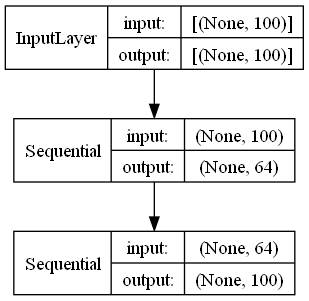

In [18]:
from keras.utils import plot_model

plot_model(autoencoder, to_file='autoencoder_model.png', show_shapes=True, show_layer_names=False)

In [19]:
print(X_test.shape)

(9800, 100)


In [17]:
############ Used for Testing TFLite model without functions ***************

# # Passing the full integer quantized TF Lite model to the interpreter.
# interpreter = tf.lite.Interpreter('AR_quantized.tflite')

# # Allocating tensors.
# interpreter.allocate_tensors()

# # Get input and output tensors.
# input_details = interpreter.get_input_details()
# output_details = interpreter.get_output_details()

# print(input_details)
# print(output_details)

# test_sample = X_test[0]
# test_sample = np.expand_dims(test_sample, axis=0)
# print(test_sample.shape)

# # Pre-processing the data to fit it with the model's input.
# input_data = np.array(test_sample, dtype=np.float32)
# # input_data = np.expand_dims(input_data, axis=-1)
# interpreter.set_tensor(input_details[0]['index'], input_data)

# # Run inference.
# interpreter.invoke()

# # Post-processing: remove batch dimension and find the digit with highest
# # probability.
# output_data = interpreter.get_tensor(output_details[0]['index'])
# # print(output_data)
# print(output_data.shape)

307/307 [==============================] - 2s 3ms/step
Threshold:  0.005247353847958646
1532/1532 [==============================] - 4s 2ms/step
Number of anomalies in healthy data: 2383 out of 49000 samples
Anomalies in normal data: 4.8632653061224485 %
1532/1532 [==============================] - 5s 3ms/step
Number of anomalies in unhealthy data: 44434 out of 49000 samples
Anomalies in alternate data: 90.68163265306123 %


C:\Users\jared\AppData\Local\Temp\ipykernel_9008\3988887628.py:63: UserWarning: Matplotlib is currently using module://matplotlib_inline.backend_inline, which is a non-GUI backend, so cannot show the figure.
  fig.show()


1532/1532 [==============================] - 4s 3ms/step
Number of anomalies in healthy2 data: 15083 out of 49000 samples
Anomalies in normal2 data: 30.781632653061227 %


C:\Users\jared\AppData\Local\Temp\ipykernel_9008\3988887628.py:96: UserWarning: Matplotlib is currently using module://matplotlib_inline.backend_inline, which is a non-GUI backend, so cannot show the figure.
  fig1.show()


1532/1532 [==============================] - 5s 3ms/step
Number of anomalies in cavitation data: 40506 out of 49000 samples
Anomalies in cavitation data: 82.66530612244898 %


C:\Users\jared\AppData\Local\Temp\ipykernel_9008\3988887628.py:128: UserWarning: Matplotlib is currently using module://matplotlib_inline.backend_inline, which is a non-GUI backend, so cannot show the figure.
  fig2.show()


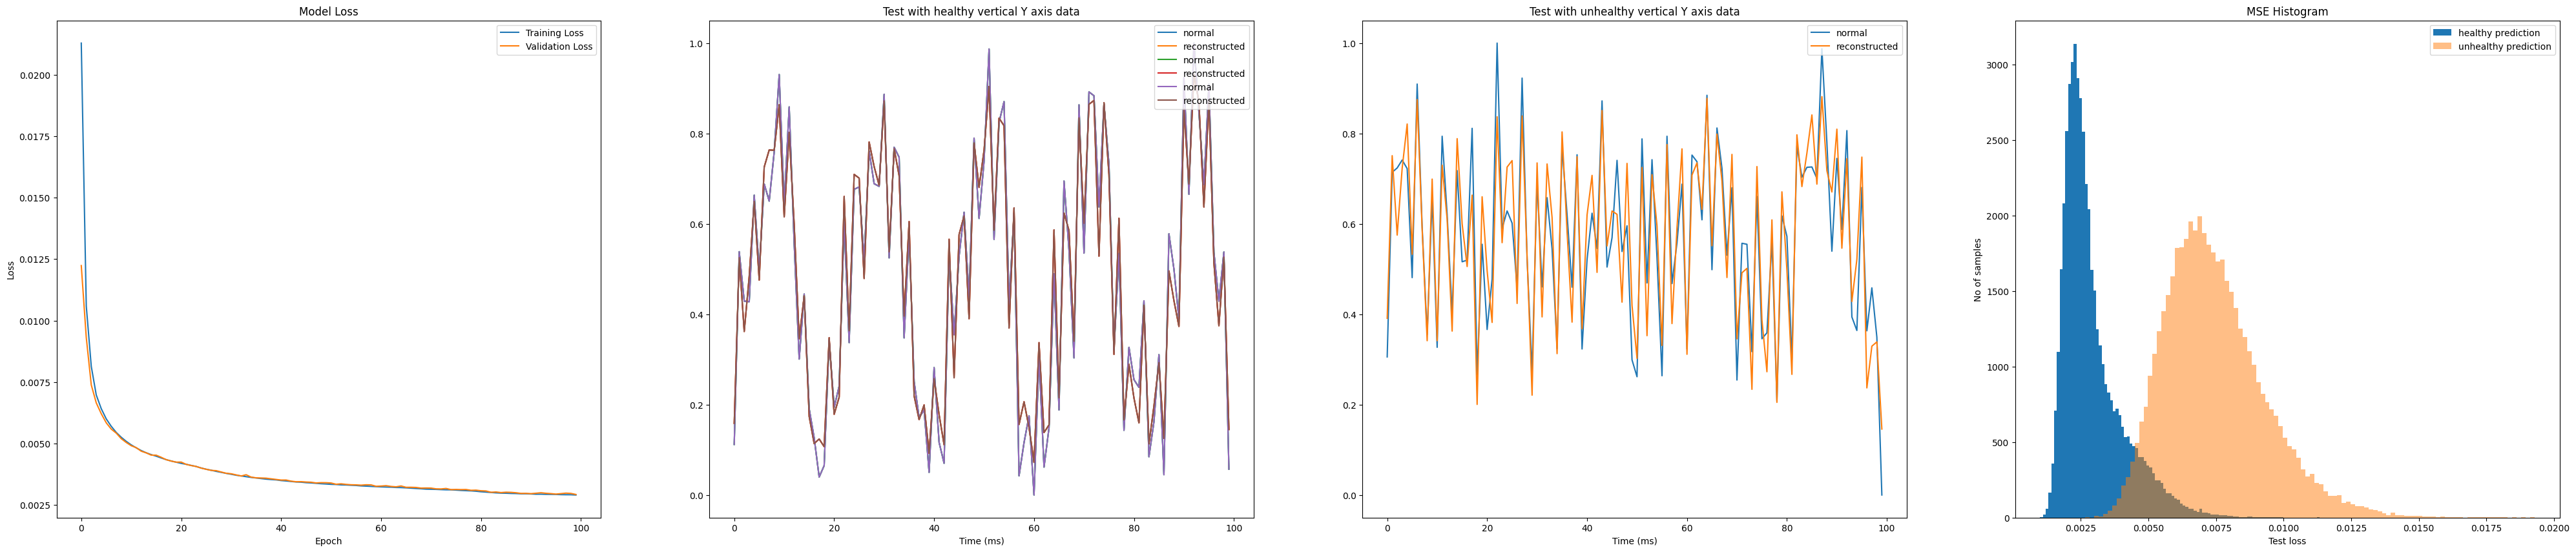

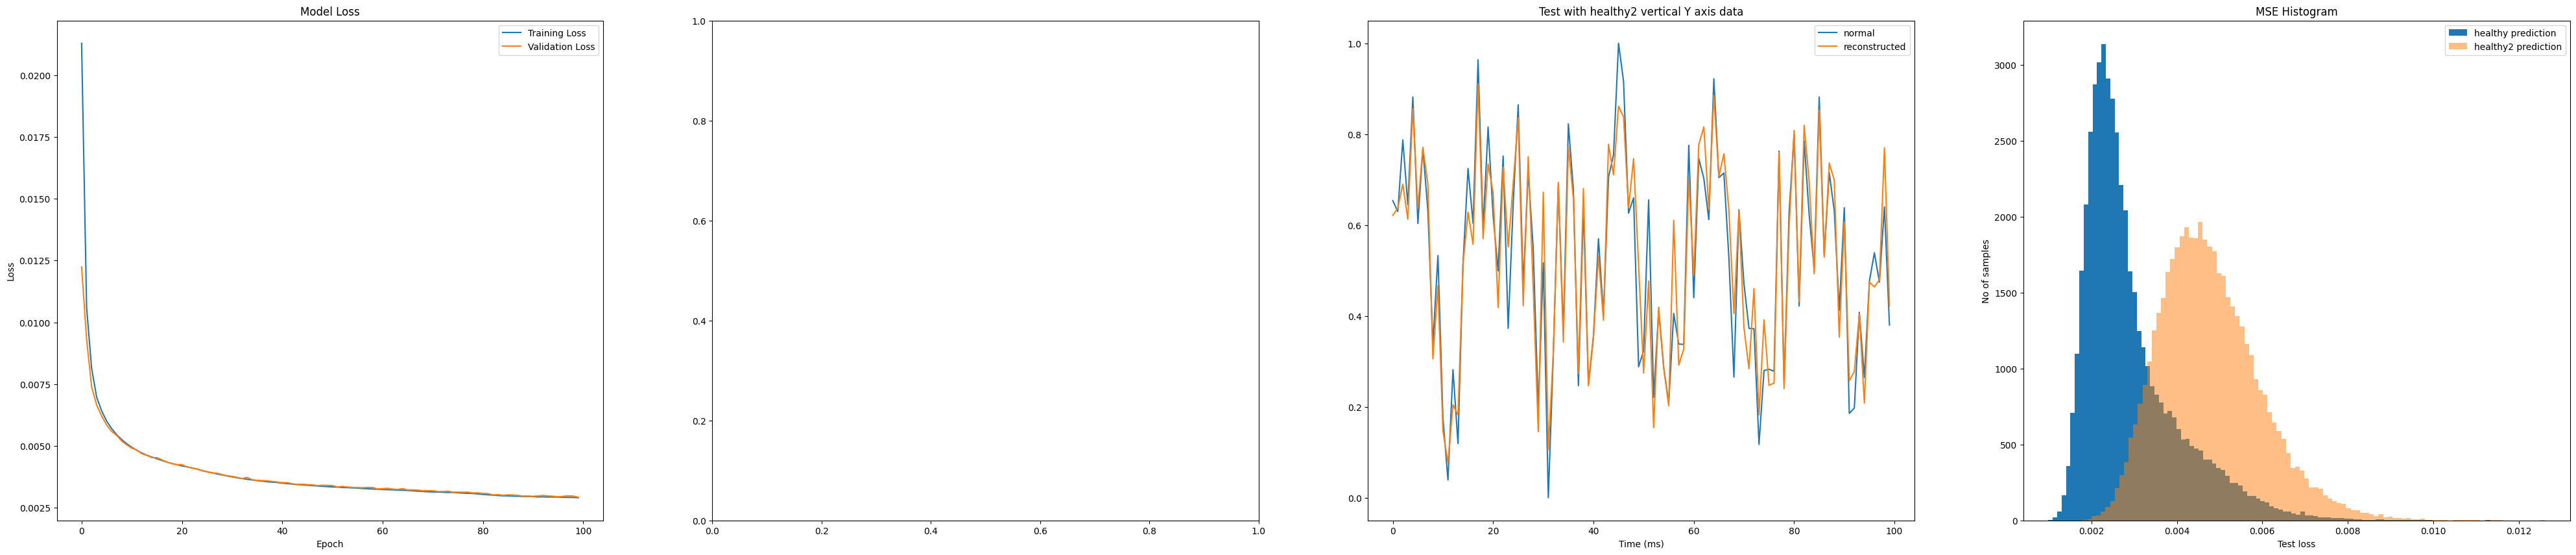

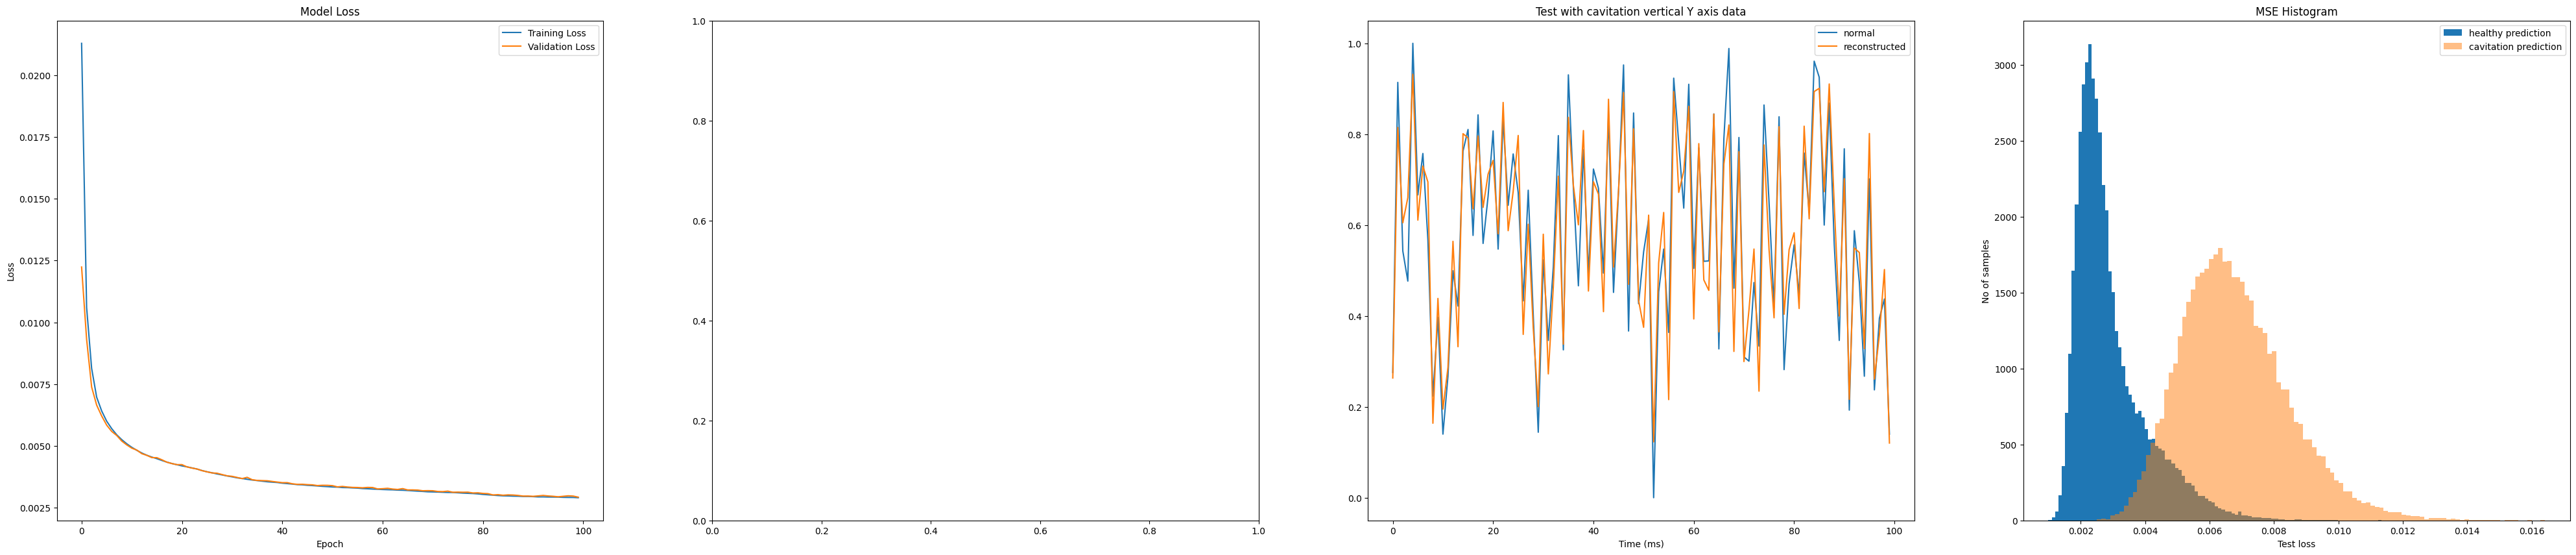

In [20]:
# Step 5: Evaluate the model
reconstructed_data = autoencoder.predict(X_test)
mse = np.mean(np.power(X_test - reconstructed_data, 2), axis = 1)

# Step 6: Set a threshold
threshold = np.percentile(mse, 95)  # Set the threshold to the 95th percentile of the reconstruction errors
print("Threshold: ", threshold)

fig, ax = plt.subplots(1, 4, figsize=(50, 10))

# Step 7: Anomaly detection
def is_anomaly(data, model, threshold, title, ax, axpos):
    reconstructed_data = model.predict(data)
    
    ax[axpos].set_title(title)
    ax[axpos].plot(data[0, :], label='normal')
    ax[axpos].plot(reconstructed_data[0, :], label='reconstructed')
    ax[axpos].set_xlabel("Time (ms)")
    ax[axpos].legend(loc='upper right')
    
    mse = np.mean(np.power(data - reconstructed_data, 2), axis = 1)
    return mse > threshold, mse

# Plot training & validation loss values
ax[0].plot(history.history['loss'], label='Training Loss')
ax[0].plot(history.history['val_loss'], label='Validation Loss')
ax[0].set_title('Model Loss')
ax[0].set_ylabel('Loss')
ax[0].set_xlabel('Epoch')
ax[0].legend(loc='upper right')

# Test with a new data point
count_norm = 0
healthy_data = data_healthy_vert_normalised[1]
unhealthy_data = data_unhealthy_vert_normalised[1]
anomalies_normal, mse_normal = is_anomaly(healthy_data, autoencoder, threshold, "Test with healthy vertical Y axis data", ax, 1)

for i in anomalies_normal:
    if i == True:
        count_norm += 1
        
print("Number of anomalies in healthy data:", count_norm, "out of", anomalies_normal.size, "samples")
print("Anomalies in normal data:", (count_norm / anomalies_normal.size) * 100, "%")

# Test unhealthy data
anomalies_alternate, mse_alternate = is_anomaly(unhealthy_data, autoencoder, threshold, "Test with unhealthy vertical Y axis data", ax, 2)

count_alternate = 0
for i in anomalies_alternate:
    if i == True:
        count_alternate += 1

print("Number of anomalies in unhealthy data:", count_alternate, "out of", anomalies_alternate.size, "samples")
print("Anomalies in alternate data:", (count_alternate / anomalies_alternate.size) * 100, "%")

# plot mse histogram
ax[3].set_title("MSE Histogram")
ax[3].hist(mse_normal, bins=100, label='healthy prediction')
ax[3].hist(mse_alternate, bins=100, label='unhealthy prediction', alpha=0.5)
ax[3].set_xlabel("Test loss")
ax[3].set_ylabel("No of samples")
ax[3].legend(loc='upper right')
fig.show()


### Plotting of healthy vs healthy2 data
fig1, ax1 = plt.subplots(1, 4, figsize=(50, 10))
# Test healthy2 data
count_norm2 = 0
healthy_data = data_healthy_vert_normalised[1]
healthy2_data = data_healthy2_vert_normalised[1]
anomalies_normal, mse_normal = is_anomaly(healthy_data, autoencoder, threshold, "Test with healthy vertical Y axis data", ax, 1)
anomalies_normal2, mse_normal2 = is_anomaly(healthy2_data, autoencoder, threshold, "Test with healthy2 vertical Y axis data", ax1, 2)

for i in anomalies_normal2:
    if i == True:
        count_norm2 += 1

print("Number of anomalies in healthy2 data:", count_norm2, "out of", anomalies_normal2.size, "samples")
print("Anomalies in normal2 data:", (count_norm2 / anomalies_normal2.size) * 100, "%")

ax1[0].plot(history.history['loss'], label='Training Loss')
ax1[0].plot(history.history['val_loss'], label='Validation Loss')
ax1[0].set_title('Model Loss')
ax1[0].set_ylabel('Loss')
ax1[0].set_xlabel('Epoch')
ax1[0].legend(loc='upper right')

# plot mse histogram
ax1[3].set_title("MSE Histogram")
ax1[3].hist(mse_normal, bins=100, label='healthy prediction')
ax1[3].hist(mse_normal2, bins=100, label='healthy2 prediction', alpha=0.5)
ax1[3].set_xlabel("Test loss")
ax1[3].set_ylabel("No of samples")
ax1[3].legend(loc='upper right')
fig1.show()

### Plotting of healthy vs cavitation data
fig2, ax2 = plt.subplots(1, 4, figsize=(50, 10))
# Test cavitation data
count_cavitation = 0
healthy_data = data_healthy_vert_normalised[1]
cavitation_data = data_cavitation_vert_normalised[1]
anomalies_normal, mse_normal = is_anomaly(healthy_data, autoencoder, threshold, "Test with healthy vertical Y axis data", ax, 1)
anomalies_cavitation, mse_cavitation = is_anomaly(cavitation_data, autoencoder, threshold, "Test with cavitation vertical Y axis data", ax2, 2)

for i in anomalies_cavitation:
    if i == True:
        count_cavitation += 1

print("Number of anomalies in cavitation data:", count_cavitation, "out of", anomalies_cavitation.size, "samples")
print("Anomalies in cavitation data:", (count_cavitation / anomalies_cavitation.size) * 100, "%")

ax2[0].plot(history.history['loss'], label='Training Loss')
ax2[0].plot(history.history['val_loss'], label='Validation Loss')
ax2[0].set_title('Model Loss')
ax2[0].set_ylabel('Loss')
ax2[0].set_xlabel('Epoch')
ax2[0].legend(loc='upper right')

# plot mse histogram
ax2[3].set_title("MSE Histogram")
ax2[3].hist(mse_normal, bins=100, label='healthy prediction')
ax2[3].hist(mse_cavitation, bins=100, label='cavitation prediction', alpha=0.5)
ax2[3].set_xlabel("Test loss")
ax2[3].set_ylabel("No of samples")
ax2[3].legend(loc='upper right')
fig2.show()


### Testing using healthy2 data as the normal data instead

In [26]:
########## Testing using healthy2 as the normal data instead

import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from keras.models import Model
from keras.layers import Input, Dense, LeakyReLU, Conv1D, MaxPooling1D, UpSampling1D
from keras.optimizers import Adam, Nadam
from keras.callbacks import EarlyStopping
from keras.losses import mse as mse_loss
from keras import Sequential
from keras.layers import Dropout
from keras.regularizers import l1, l2

# Step 2: Split the data
X2_train, X2_test = train_test_split(data_healthy2_vert_normalised[1], test_size=0.20, random_state=42)

################### DENSE ONE TO TRY REDUCE MODEL SIZE
input_size2 = X2_train.shape[1]

input_layer2 = Input(shape=(input_size2,))
encoder_layer2 = Sequential([
    Dense(64, activation='elu'),
    Dropout(0),
    Dense(64, activation='elu'),
    Dropout(0),
    Dense(64, activation='elu'),
])

decoder_layer2 = Sequential([
    Dense(64, activation='elu'),
    Dropout(0),
    Dense(64, activation='elu'),
    Dropout(0),
    Dense(input_size2, activation='sigmoid')
])

encoder_layer2 = encoder_layer2(input_layer2)
decoder_layer2 = decoder_layer2(encoder_layer2)

autoencoder2 = Model(inputs=input_layer2, outputs=decoder_layer2)

early_stopping2 = EarlyStopping(monitor='val_loss', patience=5, restore_best_weights=True, mode="auto")

# Step 4: Train the autoencoder
autoencoder2.compile(optimizer=Adam(learning_rate=0.001), loss='mean_squared_error')

# Train the autoencoder with the EarlyStopping callback
history2 = autoencoder2.fit(
    X2_train, X2_train,
    epochs=100,
    batch_size=256,
    validation_data=(X2_test, X2_test),
    callbacks=[early_stopping2],
    verbose=1
)

Epoch 1/100
154/154 [==============================] - 3s 8ms/step - loss: 0.0209 - val_loss: 0.0123
Epoch 2/100
154/154 [==============================] - 1s 10ms/step - loss: 0.0101 - val_loss: 0.0083
Epoch 3/100
154/154 [==============================] - 1s 9ms/step - loss: 0.0077 - val_loss: 0.0072
Epoch 4/100
154/154 [==============================] - 2s 10ms/step - loss: 0.0068 - val_loss: 0.0066
Epoch 5/100
154/154 [==============================] - 2s 10ms/step - loss: 0.0062 - val_loss: 0.0060
Epoch 6/100
154/154 [==============================] - 1s 8ms/step - loss: 0.0058 - val_loss: 0.0057
Epoch 7/100
154/154 [==============================] - 1s 6ms/step - loss: 0.0055 - val_loss: 0.0054
Epoch 8/100
154/154 [==============================] - 1s 7ms/step - loss: 0.0052 - val_loss: 0.0052
Epoch 9/100
154/154 [==============================] - 1s 5ms/step - loss: 0.0050 - val_loss: 0.0050
Epoch 10/100
154/154 [==============================] - 1s 6ms/step - loss: 0.0049 - val

307/307 [==============================] - 2s 5ms/step
Threshold2:  0.004281735913652582
1532/1532 [==============================] - 6s 4ms/step
Number of anomalies in healthy data: 2286 out of 49000 samples
Anomalies in normal data: 4.66530612244898 %
1532/1532 [==============================] - 7s 5ms/step
Number of anomalies in unhealthy data: 47153 out of 49000 samples
Anomalies in alternate data: 96.23061224489796 %


C:\Users\jared\AppData\Local\Temp\ipykernel_9008\3226657425.py:63: UserWarning: Matplotlib is currently using module://matplotlib_inline.backend_inline, which is a non-GUI backend, so cannot show the figure.
  fig.show()


1532/1532 [==============================] - 7s 4ms/step
Number of anomalies in healthy2 data: 19435 out of 49000 samples
Anomalies in normal2 data: 39.66326530612245 %


C:\Users\jared\AppData\Local\Temp\ipykernel_9008\3226657425.py:96: UserWarning: Matplotlib is currently using module://matplotlib_inline.backend_inline, which is a non-GUI backend, so cannot show the figure.
  fig1.show()


1532/1532 [==============================] - 7s 4ms/step
Number of anomalies in cavitation data: 20398 out of 49000 samples
Anomalies in cavitation data: 41.628571428571426 %


C:\Users\jared\AppData\Local\Temp\ipykernel_9008\3226657425.py:128: UserWarning: Matplotlib is currently using module://matplotlib_inline.backend_inline, which is a non-GUI backend, so cannot show the figure.
  fig2.show()


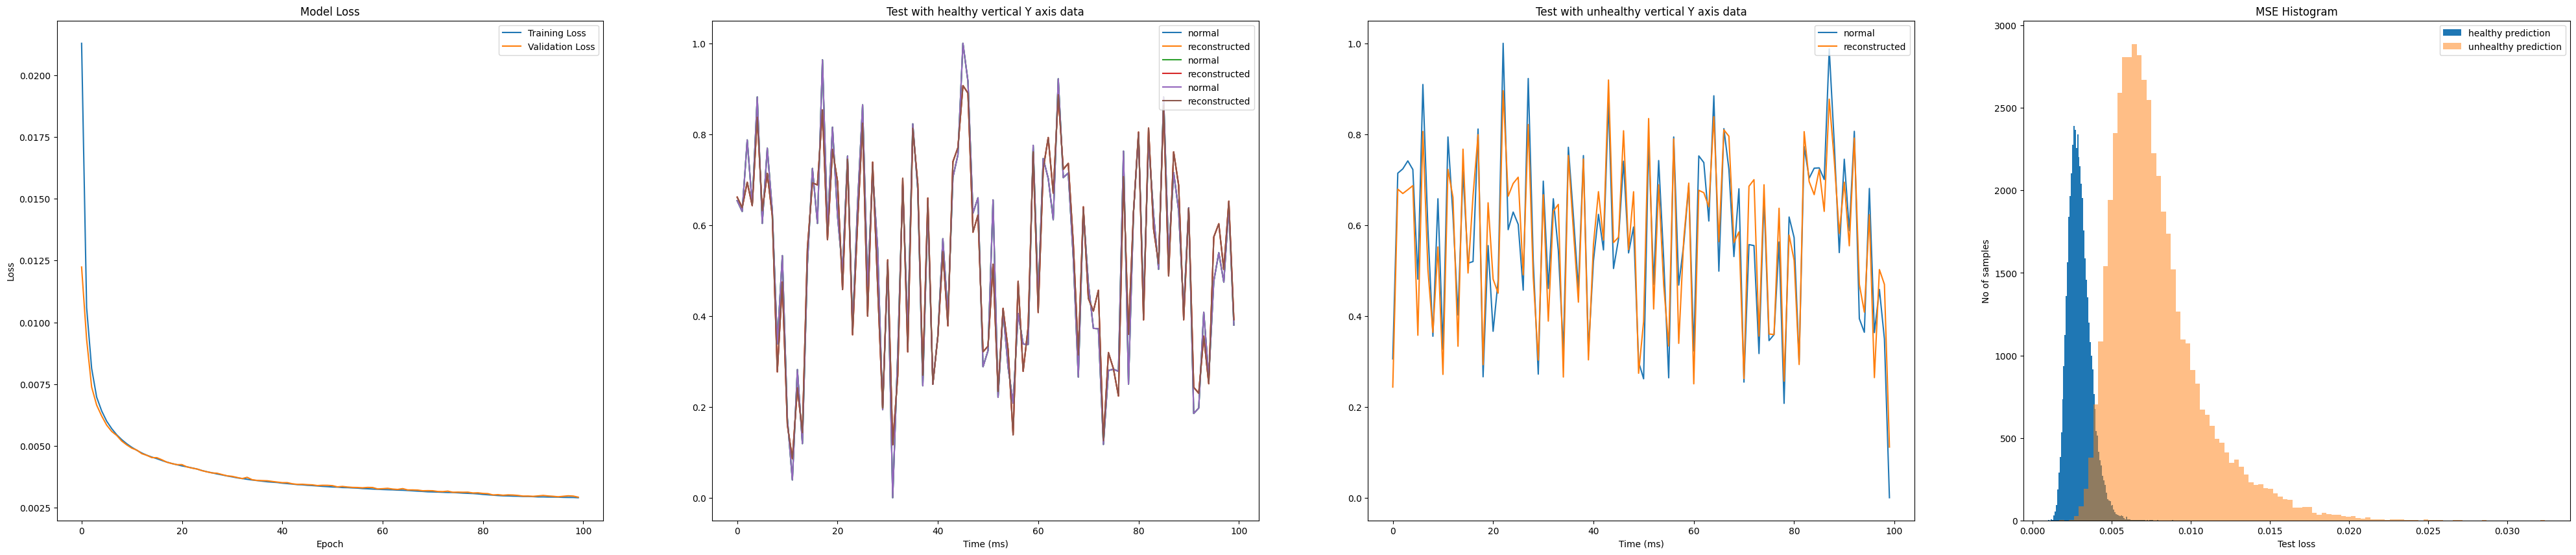

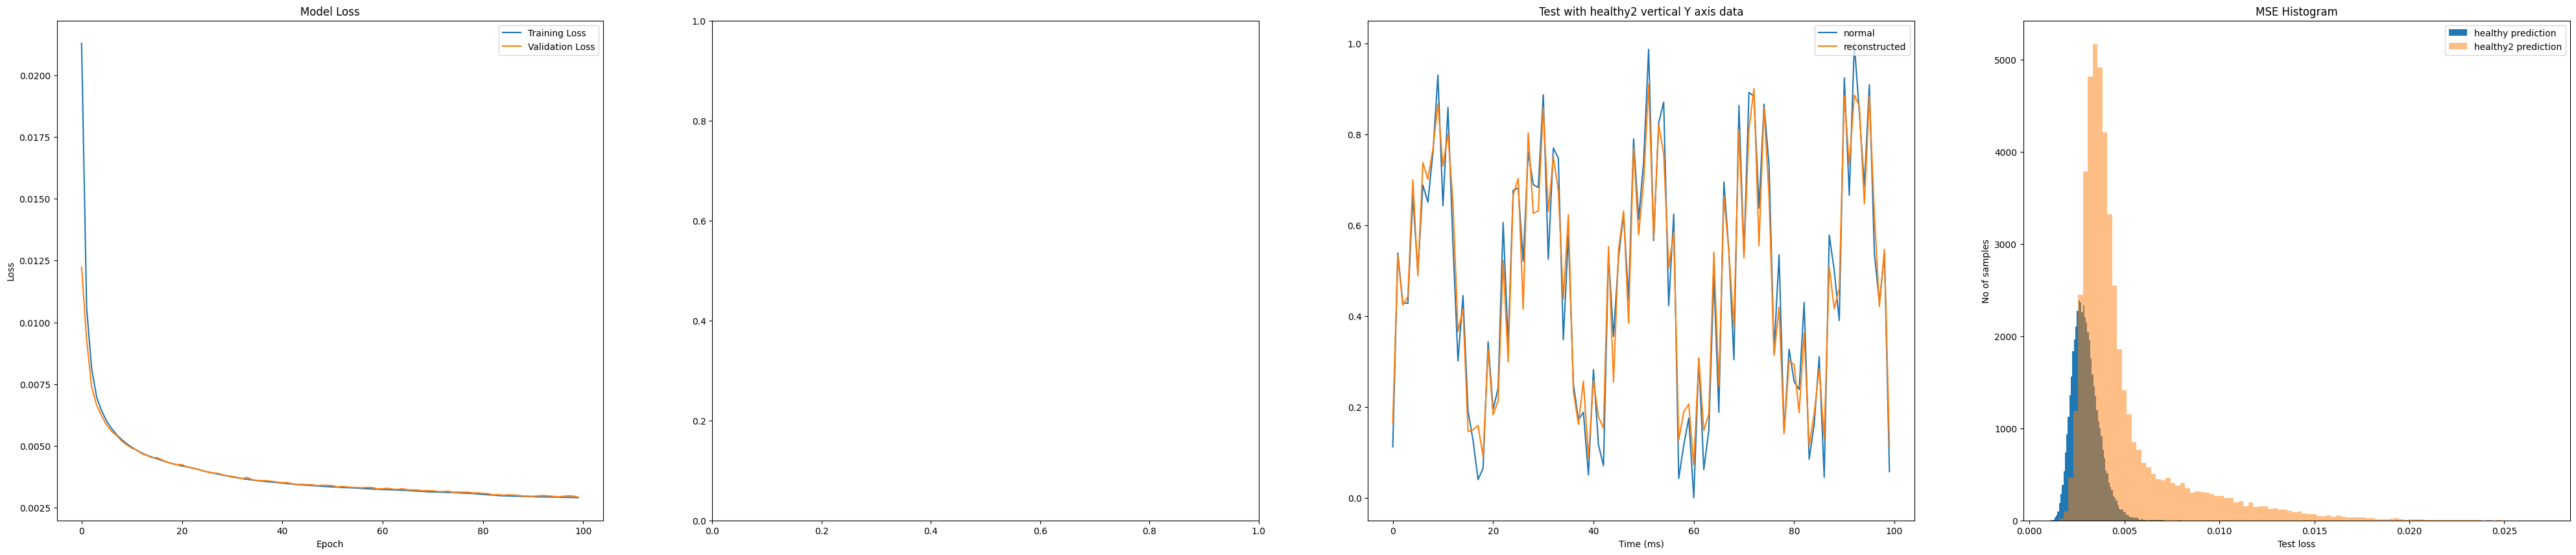

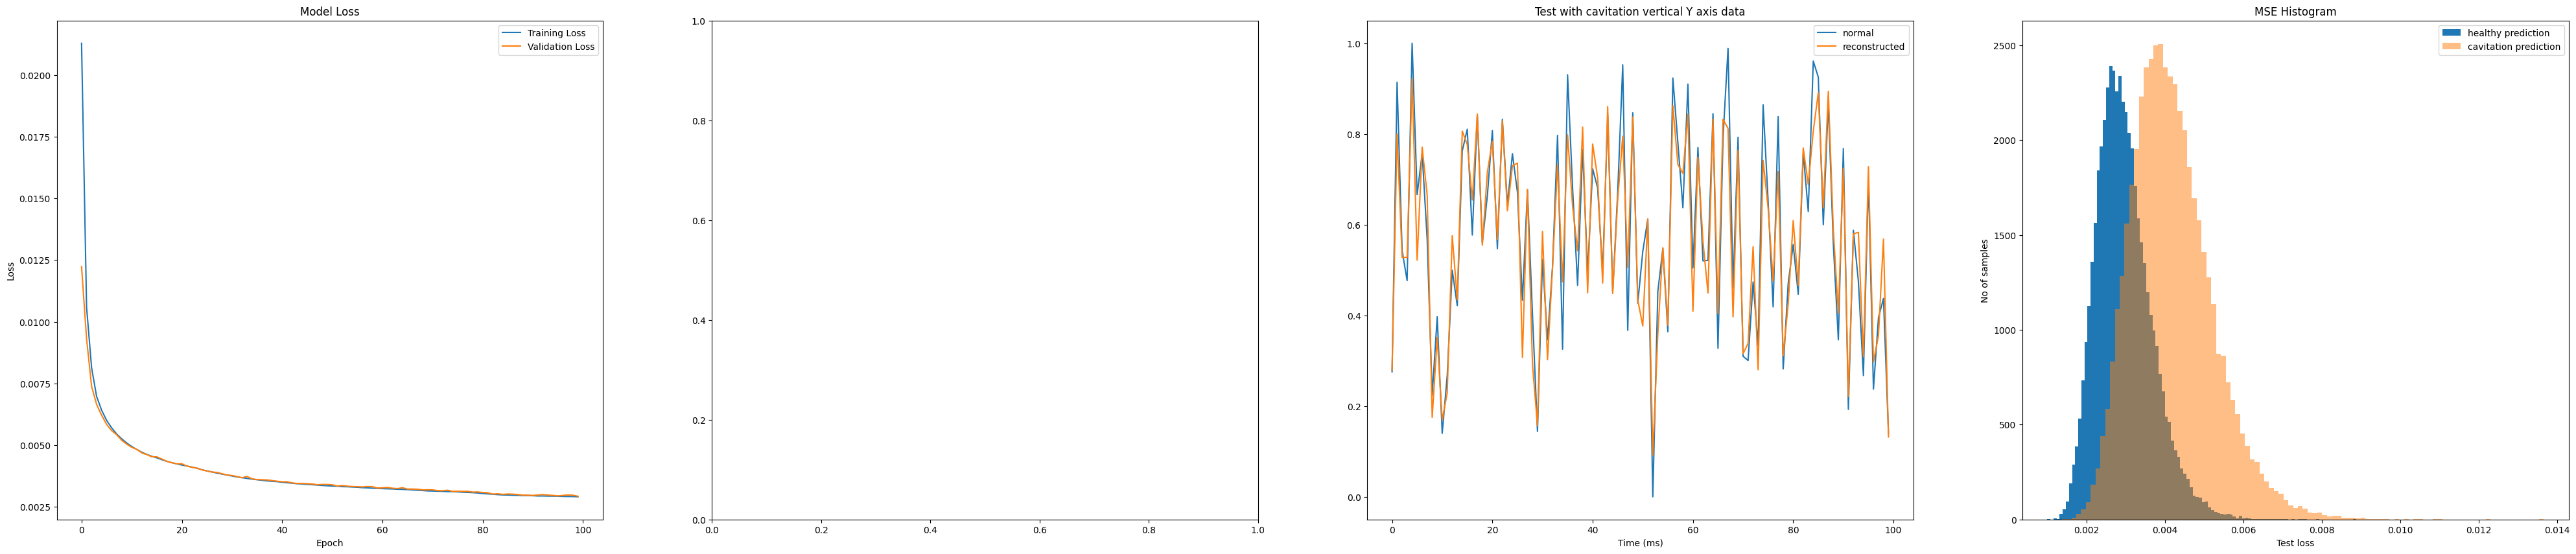

In [28]:
# Evaluate the healthy2 model
reconstructed_data2 = autoencoder2.predict(X2_test)
mse2 = np.mean(np.power(X2_test - reconstructed_data2, 2), axis = 1)

# Step 6: Set a threshold
threshold2 = np.percentile(mse2, 95)  # Set the threshold to the 95th percentile of the reconstruction errors
print("Threshold2: ", threshold2)

fig, ax = plt.subplots(1, 4, figsize=(50, 10))

# Step 7: Anomaly detection
def is_anomaly(data, model, threshold, title, ax, axpos):
    reconstructed_data = model.predict(data)
    
    ax[axpos].set_title(title)
    ax[axpos].plot(data[0, :], label='normal')
    ax[axpos].plot(reconstructed_data[0, :], label='reconstructed')
    ax[axpos].set_xlabel("Time (ms)")
    ax[axpos].legend(loc='upper right')
    
    mse = np.mean(np.power(data - reconstructed_data, 2), axis = 1)
    return mse > threshold, mse

# Plot training & validation loss values
ax[0].plot(history.history['loss'], label='Training Loss')
ax[0].plot(history.history['val_loss'], label='Validation Loss')
ax[0].set_title('Model Loss')
ax[0].set_ylabel('Loss')
ax[0].set_xlabel('Epoch')
ax[0].legend(loc='upper right')

# Test with a new data point
count_norm = 0
healthy_data = data_healthy2_vert_normalised[1]
unhealthy_data = data_unhealthy_vert_normalised[1]
anomalies_normal, mse_normal = is_anomaly(healthy_data, autoencoder2, threshold2, "Test with healthy vertical Y axis data", ax, 1)

for i in anomalies_normal:
    if i == True:
        count_norm += 1
        
print("Number of anomalies in healthy data:", count_norm, "out of", anomalies_normal.size, "samples")
print("Anomalies in normal data:", (count_norm / anomalies_normal.size) * 100, "%")

# Test unhealthy data
anomalies_alternate, mse_alternate = is_anomaly(unhealthy_data, autoencoder2, threshold2, "Test with unhealthy vertical Y axis data", ax, 2)

count_alternate = 0
for i in anomalies_alternate:
    if i == True:
        count_alternate += 1

print("Number of anomalies in unhealthy data:", count_alternate, "out of", anomalies_alternate.size, "samples")
print("Anomalies in alternate data:", (count_alternate / anomalies_alternate.size) * 100, "%")

# plot mse histogram
ax[3].set_title("MSE Histogram")
ax[3].hist(mse_normal, bins=100, label='healthy prediction')
ax[3].hist(mse_alternate, bins=100, label='unhealthy prediction', alpha=0.5)
ax[3].set_xlabel("Test loss")
ax[3].set_ylabel("No of samples")
ax[3].legend(loc='upper right')
fig.show()


### Plotting of healthy vs healthy2 data
fig1, ax1 = plt.subplots(1, 4, figsize=(50, 10))
# Test healthy2 data
count_norm2 = 0
healthy_data = data_healthy2_vert_normalised[1]
healthy2_data = data_healthy_vert_normalised[1]
anomalies_normal, mse_normal = is_anomaly(healthy_data, autoencoder2, threshold2, "Test with healthy vertical Y axis data", ax, 1)
anomalies_normal2, mse_normal2 = is_anomaly(healthy2_data, autoencoder2, threshold2, "Test with healthy2 vertical Y axis data", ax1, 2)

for i in anomalies_normal2:
    if i == True:
        count_norm2 += 1

print("Number of anomalies in healthy2 data:", count_norm2, "out of", anomalies_normal2.size, "samples")
print("Anomalies in normal2 data:", (count_norm2 / anomalies_normal2.size) * 100, "%")

ax1[0].plot(history.history['loss'], label='Training Loss')
ax1[0].plot(history.history['val_loss'], label='Validation Loss')
ax1[0].set_title('Model Loss')
ax1[0].set_ylabel('Loss')
ax1[0].set_xlabel('Epoch')
ax1[0].legend(loc='upper right')

# plot mse histogram
ax1[3].set_title("MSE Histogram")
ax1[3].hist(mse_normal, bins=100, label='healthy prediction')
ax1[3].hist(mse_normal2, bins=100, label='healthy2 prediction', alpha=0.5)
ax1[3].set_xlabel("Test loss")
ax1[3].set_ylabel("No of samples")
ax1[3].legend(loc='upper right')
fig1.show()

### Plotting of healthy vs cavitation data
fig2, ax2 = plt.subplots(1, 4, figsize=(50, 10))
# Test cavitation data
count_cavitation = 0
healthy_data = data_healthy2_vert_normalised[1]
cavitation_data = data_cavitation_vert_normalised[1]
anomalies_normal, mse_normal = is_anomaly(healthy_data, autoencoder2, threshold2, "Test with healthy vertical Y axis data", ax, 1)
anomalies_cavitation, mse_cavitation = is_anomaly(cavitation_data, autoencoder2, threshold2, "Test with cavitation vertical Y axis data", ax2, 2)

for i in anomalies_cavitation:
    if i == True:
        count_cavitation += 1

print("Number of anomalies in cavitation data:", count_cavitation, "out of", anomalies_cavitation.size, "samples")
print("Anomalies in cavitation data:", (count_cavitation / anomalies_cavitation.size) * 100, "%")

ax2[0].plot(history.history['loss'], label='Training Loss')
ax2[0].plot(history.history['val_loss'], label='Validation Loss')
ax2[0].set_title('Model Loss')
ax2[0].set_ylabel('Loss')
ax2[0].set_xlabel('Epoch')
ax2[0].legend(loc='upper right')

# plot mse histogram
ax2[3].set_title("MSE Histogram")
ax2[3].hist(mse_normal, bins=100, label='healthy prediction')
ax2[3].hist(mse_cavitation, bins=100, label='cavitation prediction', alpha=0.5)
ax2[3].set_xlabel("Test loss")
ax2[3].set_ylabel("No of samples")
ax2[3].legend(loc='upper right')
fig2.show()

### Conversion to TFLite model

In [21]:
import numpy as np
import tensorflow as tf
from tensorflow.keras import layers
from tinymlgen import port

from tensorflow.keras.layers import Dense
from tensorflow.keras.callbacks import EarlyStopping
from tensorflow.keras.layers import Dropout
from tensorflow.keras.models import Sequential

# def representative_dataset():
#     for val in X_test:
#         # val = np.expand_dims(val, axis=0)
#         yield [np.array(val, dtype=np.float32)]

def representative_dataset():
    for data in tf.data.Dataset.from_tensor_slices(X_test).batch(1).take(1000):
        yield [tf.dtypes.cast(data, tf.float32)]

# Full integer quantization
fullint_converter = tf.lite.TFLiteConverter.from_keras_model(autoencoder)
fullint_converter.optimizations = [tf.lite.Optimize.DEFAULT]
fullint_converter.representative_dataset = representative_dataset
fullint_tflite_model = fullint_converter.convert()

# Save the models to disk
open("AR_model_fullint_quantized.tflite", "wb").write(fullint_tflite_model)


INFO:tensorflow:Assets written to: C:\Users\jared\AppData\Local\Temp\tmps31lqe92\assets


INFO:tensorflow:Assets written to: C:\Users\jared\AppData\Local\Temp\tmps31lqe92\assets
c:\Users\jared\AppData\Local\Programs\Python\Python310\lib\site-packages\tensorflow\lite\python\convert.py:887: UserWarning: Statistics for quantized inputs were expected, but not specified; continuing anyway.
  warnings.warn(


37344

Need to run the following line on bash cmdline

"xxd -i AR_model_fullint_quantized.tflite > AR_model_fullint_quantized.cc"

In [24]:
# For Conv1D
# def evaluate_model(interpreter, dataset, threshold):
#     # Get input and output tensors.
#     input_details = interpreter.get_input_details()
#     output_details = interpreter.get_output_details()
#     num_test_samples = dataset.shape[0]

#     # Run predictions on every set in the "test" dataset.
#     reconstructed_data = []
#     for i in range(num_test_samples):

#         # Pre-processing the data to fit it with the model's input.
#         input_data = np.array(dataset[i], dtype=np.float32)
#         input_data = np.expand_dims(input_data, axis=0)
#         interpreter.set_tensor(input_details[0]['index'], input_data)

#         # Run inference.
#         interpreter.invoke()

#         # Post-processing: remove batch dimension and find the digit with highest
#         # probability.
#         output_data = interpreter.get_tensor(output_details[0]['index'])
#         reconstructed_data.append(output_data[0])

#     # Convert to numpy array from list for easier comparison
#     reconstructed_data = np.array(reconstructed_data)

#     mse = np.mean(np.power(dataset - reconstructed_data, 2), axis=(1, 2))

#     anorm_count = 0
#     for i in range(len(mse)):
#         if mse[i] > threshold:
#             anorm_count += 1
    
#     return np.array(reconstructed_data), mse, anorm_count

# For Dense
def evaluate_model(interpreter, dataset, threshold):
    # Get input and output tensors.
    input_details = interpreter.get_input_details()
    output_details = interpreter.get_output_details()
    num_test_samples = dataset.shape[0]
    # print("Dataset shape: ", dataset.shape)

    # Run predictions on every set in the "test" dataset.
    reconstructed_data = []
    for i in range(num_test_samples):

        # Pre-processing the data to fit it with the model's input.
        input_data = np.array(dataset[i], dtype=np.float32)
        # print("Input data shape:", input_data.shape)
        input_data = np.expand_dims(input_data, axis=0)
        # print("Input data shape after expand_dims:", input_data.shape)
        interpreter.set_tensor(input_details[0]['index'], input_data)

        # Run inference.
        interpreter.invoke()

        # Post-processing: remove batch dimension and find the digit with highest
        # probability.
        output_data = interpreter.get_tensor(output_details[0]['index'])
        reconstructed_data.append(output_data[0])

    # Convert to numpy array from list for easier comparison
    reconstructed_data = np.array(reconstructed_data)

    mse = np.mean(np.power(dataset - reconstructed_data, 2), axis=1)

    anorm_count = 0
    for i in range(num_test_samples):
        if mse[i] > threshold:
            anorm_count += 1
    
    return np.array(reconstructed_data), mse, anorm_count

In [25]:
# Processing data to pass into interpreter
# healthy_data = np.expand_dims(data_healthy_vert_normalised[1], axis=-1)
# unhealthy_data = np.expand_dims(data_unhealthy_vert_normalised[1], axis=-1)
healthy_data = data_healthy_vert_normalised[1]
unhealthy_data = data_unhealthy_vert_normalised[1]
healthy2_data = data_healthy2_vert_normalised[1]
cavitation_data = data_cavitation_vert_normalised[1]

# Passing the full integer quantized TF Lite model to the interpreter.
interpreter = tf.lite.Interpreter('AR_model_fullint_quantized.tflite')

# Allocating tensors.
interpreter.allocate_tensors()

recon_data_baseline, mse_baseline, anorm_count_baseline = evaluate_model(interpreter, X_test, threshold)

# Set a threshold
threshold = np.percentile(mse_baseline, 95)  # Set the threshold to the 95th percentile of the reconstruction errors
print("Threshold: ", threshold)

recon_data_healthy, mse_healthy, anorm_count_healthy = evaluate_model(interpreter, healthy_data, threshold)

# print(recon_data_healthy.shape)

print("Number of anomalies in healthy data:", anorm_count_healthy, "out of", healthy_data.shape[0], "samples")
print("Anomalies in normal data:", (anorm_count_healthy / healthy_data.shape[0]) * 100, "%")

recon_data_unhealthy, mse_unhealthy, anorm_count_unhealthy = evaluate_model(interpreter, unhealthy_data, threshold)

# print(recon_data_unhealthy.shape)

print("Number of anomalies in unhealthy data:", anorm_count_unhealthy, "out of", unhealthy_data.shape[0], "samples")
print("Anomalies in unhealthy data:", (anorm_count_unhealthy / unhealthy_data.shape[0]) * 100, "%")

recon_data_healthy2, mse_healthy2, anorm_count_healthy2 = evaluate_model(interpreter, healthy2_data, threshold) 

print("Number of anomalies in healthy2 data:", anorm_count_healthy2, "out of", healthy2_data.shape[0], "samples")
print("Anomalies in healthy2 data:", (anorm_count_healthy2 / healthy2_data.shape[0]) * 100, "%")

recon_data_cavitation, mse_cavitation, anorm_count_cavitation = evaluate_model(interpreter, cavitation_data, threshold)

print("Number of anomalies in cavitation data:", anorm_count_cavitation, "out of", cavitation_data.shape[0], "samples")
print("Anomalies in cavitation data:", (anorm_count_cavitation / cavitation_data.shape[0]) * 100, "%")


Threshold:  0.005522353299118515
Number of anomalies in healthy data: 2385 out of 49000 samples
Anomalies in normal data: 4.86734693877551 %
Number of anomalies in unhealthy data: 44351 out of 49000 samples
Anomalies in unhealthy data: 90.51224489795918 %
Number of anomalies in healthy2 data: 14986 out of 49000 samples
Anomalies in healthy2 data: 30.583673469387758 %
Number of anomalies in cavitation data: 40495 out of 49000 samples
Anomalies in cavitation data: 82.64285714285714 %


In [23]:
# Getting data to csv to put on to Google sheets
# sample_size = 10000

# healthy_data_to_test = pd.DataFrame(healthy_data)
# healthy_data_to_test = healthy_data_to_test.sample(n=sample_size)

# unhealthy_data_to_test = pd.DataFrame(unhealthy_data)
# unhealthy_data_to_test = unhealthy_data_to_test.sample(n=sample_size)

# healthy_data_to_test.to_csv('C:/Users/jared/Desktop/TFLite_ARhealthydata.csv',index=False,header=False)
# unhealthy_data_to_test.to_csv('C:/Users/jared/Desktop/TFLite_ARunhealthydata.csv',index=False,header=False)

### Using Talos to check hyper parameter of AR model

Reference: https://github.com/autonomio/talos/blob/master/examples/Hyperparameter%20Optimization%20with%20Keras%20for%20the%20Iris%20Prediction.ipynb

In [24]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from keras.models import Model
from keras.layers import Input, Dense, LeakyReLU, Conv1D, MaxPooling1D, UpSampling1D
from keras.optimizers import Adam, Nadam
from keras.callbacks import EarlyStopping
from keras.losses import mse as mse_loss
from keras import Sequential
from keras.layers import Dropout
from keras.regularizers import l1, l2

# Step 2: Split the data
X_train, X_test = train_test_split(data_healthy_vert_normalised[1], test_size=0.20, random_state=42)

def AR_talos_model(x_train, y_train, x_val, y_val, params):
    input_size = x_train.shape[1]

    input_layer = Input(shape=(input_size,))
    encoder_layer = Sequential([
        Dense(params['first_layer'], activation=params['activation']),
        Dropout(params['dropout']),
        Dense(params['second_layer'], activation=params['activation']),
        Dropout(params['dropout']),
        Dense(params['third_layer'], activation=params['activation'])
    ])

    decoder_layer = Sequential([
        Dense(params['third_layer'], activation=params['activation']),
        Dropout(params['dropout']),
        Dense(params['second_layer'], activation=params['activation']),
        Dropout(params['dropout']),
        Dense(input_size, activation='sigmoid')
    ])

    encoder_layer = encoder_layer(input_layer)
    decoder_layer = decoder_layer(encoder_layer)

    autoencoder = Model(inputs=input_layer, outputs=decoder_layer)

    early_stopping = EarlyStopping(monitor='val_loss', patience=10, restore_best_weights=True, mode="auto")

    # Step 4: Train the autoencoder
    autoencoder.compile(optimizer=Adam(learning_rate=0.001), loss='mean_squared_error')

    # Train the autoencoder with the EarlyStopping callback
    history = autoencoder.fit(
        x_train, x_train,
        epochs=params['epochs'],
        batch_size=params['batch_size'],
        validation_data=(x_val, x_val),
        callbacks=[early_stopping],
        verbose=1
    )
    
    return history, autoencoder


In [25]:
# Creating dict to use talos to do hyperparameter tuning
p = dict(
	first_layer=[32, 48, 64],
    second_layer=[32, 48, 64],
    third_layer=[32, 48, 64],
	activation=['relu', 'elu'],
	epochs=[50, 100, 200, 500],
	batch_size=[64, 128, 256, 512],
    dropout=[0, 0.01, 0.1, 0.15],
)

In [26]:
import talos

t = talos.Scan(X_train, 
               X_train, 
               params=p, 
               model=AR_talos_model, 
               experiment_name='AR_talos_model', 
               fraction_limit=0.01, # Fraction of hyperparameter combinations to try
               print_params=True, 
               round_limit=1)

  0%|          | 0/34 [00:00<?, ?it/s]

{'first_layer': 64, 'second_layer': 64, 'third_layer': 64, 'activation': 'relu', 'epochs': 500, 'batch_size': 256, 'dropout': 0.15}
Epoch 1/500
108/108 [==============================] - 3s 12ms/step - loss: 0.0398 - val_loss: 0.0226
Epoch 2/500
108/108 [==============================] - 1s 10ms/step - loss: 0.0225 - val_loss: 0.0164
Epoch 3/500
108/108 [==============================] - 1s 9ms/step - loss: 0.0201 - val_loss: 0.0161
Epoch 4/500
108/108 [==============================] - 1s 10ms/step - loss: 0.0194 - val_loss: 0.0161
Epoch 5/500
108/108 [==============================] - 1s 10ms/step - loss: 0.0189 - val_loss: 0.0159
Epoch 6/500
108/108 [==============================] - 1s 10ms/step - loss: 0.0187 - val_loss: 0.0159
Epoch 7/500
108/108 [==============================] - 1s 10ms/step - loss: 0.0185 - val_loss: 0.0157
Epoch 8/500
108/108 [==============================] - 1s 10ms/step - loss: 0.0181 - val_loss: 0.0151
Epoch 9/500
108/108 [==============================] 

  3%|▎         | 1/34 [01:29<48:59, 89.06s/it]

{'first_layer': 64, 'second_layer': 32, 'third_layer': 64, 'activation': 'elu', 'epochs': 50, 'batch_size': 256, 'dropout': 0.01}
Epoch 1/50
108/108 [==============================] - 3s 13ms/step - loss: 0.0297 - val_loss: 0.0165
Epoch 2/50
108/108 [==============================] - 1s 10ms/step - loss: 0.0153 - val_loss: 0.0131
Epoch 3/50
108/108 [==============================] - 1s 9ms/step - loss: 0.0128 - val_loss: 0.0116
Epoch 4/50
108/108 [==============================] - 1s 12ms/step - loss: 0.0116 - val_loss: 0.0104
Epoch 5/50
108/108 [==============================] - 1s 10ms/step - loss: 0.0106 - val_loss: 0.0096
Epoch 6/50
108/108 [==============================] - 1s 10ms/step - loss: 0.0099 - val_loss: 0.0089
Epoch 7/50
108/108 [==============================] - 1s 9ms/step - loss: 0.0093 - val_loss: 0.0082
Epoch 8/50
108/108 [==============================] - 1s 9ms/step - loss: 0.0087 - val_loss: 0.0076
Epoch 9/50
108/108 [==============================] - 1s 10ms/ste

  6%|▌         | 2/34 [02:23<36:46, 68.95s/it]

{'first_layer': 48, 'second_layer': 48, 'third_layer': 64, 'activation': 'relu', 'epochs': 200, 'batch_size': 128, 'dropout': 0}
Epoch 1/200
215/215 [==============================] - 3s 6ms/step - loss: 0.0252 - val_loss: 0.0153
Epoch 2/200
215/215 [==============================] - 1s 5ms/step - loss: 0.0139 - val_loss: 0.0123
Epoch 3/200
215/215 [==============================] - 1s 5ms/step - loss: 0.0116 - val_loss: 0.0109
Epoch 4/200
215/215 [==============================] - 1s 5ms/step - loss: 0.0104 - val_loss: 0.0100
Epoch 5/200
215/215 [==============================] - 1s 5ms/step - loss: 0.0097 - val_loss: 0.0093
Epoch 6/200
215/215 [==============================] - 1s 5ms/step - loss: 0.0089 - val_loss: 0.0086
Epoch 7/200
215/215 [==============================] - 1s 5ms/step - loss: 0.0084 - val_loss: 0.0082
Epoch 8/200
215/215 [==============================] - 1s 6ms/step - loss: 0.0081 - val_loss: 0.0079
Epoch 9/200
215/215 [==============================] - 1s 5ms/s

  9%|▉         | 3/34 [05:50<1:08:02, 131.70s/it]

{'first_layer': 32, 'second_layer': 32, 'third_layer': 64, 'activation': 'relu', 'epochs': 100, 'batch_size': 512, 'dropout': 0.1}
Epoch 1/100
54/54 [==============================] - 3s 15ms/step - loss: 0.0508 - val_loss: 0.0371
Epoch 2/100
54/54 [==============================] - 1s 11ms/step - loss: 0.0311 - val_loss: 0.0225
Epoch 3/100
54/54 [==============================] - 1s 10ms/step - loss: 0.0258 - val_loss: 0.0218
Epoch 4/100
54/54 [==============================] - 0s 9ms/step - loss: 0.0246 - val_loss: 0.0201
Epoch 5/100
54/54 [==============================] - 1s 10ms/step - loss: 0.0216 - val_loss: 0.0166
Epoch 6/100
54/54 [==============================] - 0s 9ms/step - loss: 0.0201 - val_loss: 0.0164
Epoch 7/100
54/54 [==============================] - 1s 10ms/step - loss: 0.0196 - val_loss: 0.0163
Epoch 8/100
54/54 [==============================] - 1s 12ms/step - loss: 0.0193 - val_loss: 0.0162
Epoch 9/100
54/54 [==============================] - 1s 10ms/step - los

 12%|█▏        | 4/34 [06:09<43:39, 87.32s/it]   

{'first_layer': 48, 'second_layer': 48, 'third_layer': 48, 'activation': 'elu', 'epochs': 200, 'batch_size': 512, 'dropout': 0}
Epoch 1/200
54/54 [==============================] - 2s 12ms/step - loss: 0.0370 - val_loss: 0.0207
Epoch 2/200
54/54 [==============================] - 0s 7ms/step - loss: 0.0168 - val_loss: 0.0146
Epoch 3/200
54/54 [==============================] - 0s 7ms/step - loss: 0.0136 - val_loss: 0.0126
Epoch 4/200
54/54 [==============================] - 0s 7ms/step - loss: 0.0121 - val_loss: 0.0115
Epoch 5/200
54/54 [==============================] - 0s 7ms/step - loss: 0.0111 - val_loss: 0.0105
Epoch 6/200
54/54 [==============================] - 0s 7ms/step - loss: 0.0101 - val_loss: 0.0097
Epoch 7/200
54/54 [==============================] - 0s 7ms/step - loss: 0.0093 - val_loss: 0.0088
Epoch 8/200
54/54 [==============================] - 0s 7ms/step - loss: 0.0085 - val_loss: 0.0083
Epoch 9/200
54/54 [==============================] - 0s 7ms/step - loss: 0.0081

 15%|█▍        | 5/34 [07:28<40:46, 84.37s/it]

{'first_layer': 32, 'second_layer': 32, 'third_layer': 32, 'activation': 'elu', 'epochs': 500, 'batch_size': 512, 'dropout': 0.15}
Epoch 1/500
54/54 [==============================] - 2s 12ms/step - loss: 0.0474 - val_loss: 0.0295
Epoch 2/500
54/54 [==============================] - 0s 8ms/step - loss: 0.0278 - val_loss: 0.0190
Epoch 3/500
54/54 [==============================] - 0s 8ms/step - loss: 0.0219 - val_loss: 0.0163
Epoch 4/500
54/54 [==============================] - 0s 8ms/step - loss: 0.0203 - val_loss: 0.0159
Epoch 5/500
54/54 [==============================] - 1s 10ms/step - loss: 0.0196 - val_loss: 0.0153
Epoch 6/500
54/54 [==============================] - 1s 10ms/step - loss: 0.0189 - val_loss: 0.0143
Epoch 7/500
54/54 [==============================] - 0s 9ms/step - loss: 0.0181 - val_loss: 0.0135
Epoch 8/500
54/54 [==============================] - 0s 8ms/step - loss: 0.0176 - val_loss: 0.0132
Epoch 9/500
54/54 [==============================] - 1s 10ms/step - loss: 

 18%|█▊        | 6/34 [08:01<31:09, 66.78s/it]

{'first_layer': 48, 'second_layer': 48, 'third_layer': 32, 'activation': 'elu', 'epochs': 100, 'batch_size': 256, 'dropout': 0.1}
Epoch 1/100
108/108 [==============================] - 2s 9ms/step - loss: 0.0325 - val_loss: 0.0166
Epoch 2/100
108/108 [==============================] - 1s 7ms/step - loss: 0.0180 - val_loss: 0.0135
Epoch 3/100
108/108 [==============================] - 1s 7ms/step - loss: 0.0158 - val_loss: 0.0125
Epoch 4/100
108/108 [==============================] - 1s 7ms/step - loss: 0.0149 - val_loss: 0.0118
Epoch 5/100
108/108 [==============================] - 1s 7ms/step - loss: 0.0143 - val_loss: 0.0112
Epoch 6/100
108/108 [==============================] - 1s 8ms/step - loss: 0.0139 - val_loss: 0.0109
Epoch 7/100
108/108 [==============================] - 1s 7ms/step - loss: 0.0137 - val_loss: 0.0107
Epoch 8/100
108/108 [==============================] - 1s 7ms/step - loss: 0.0135 - val_loss: 0.0105
Epoch 9/100
108/108 [==============================] - 1s 7ms/

 21%|██        | 7/34 [09:16<31:13, 69.38s/it]

{'first_layer': 32, 'second_layer': 48, 'third_layer': 48, 'activation': 'elu', 'epochs': 500, 'batch_size': 256, 'dropout': 0.01}
Epoch 1/500
108/108 [==============================] - 2s 9ms/step - loss: 0.0277 - val_loss: 0.0156
Epoch 2/500
108/108 [==============================] - 1s 6ms/step - loss: 0.0144 - val_loss: 0.0126
Epoch 3/500
108/108 [==============================] - 1s 7ms/step - loss: 0.0125 - val_loss: 0.0112
Epoch 4/500
108/108 [==============================] - 1s 7ms/step - loss: 0.0112 - val_loss: 0.0101
Epoch 5/500
108/108 [==============================] - 1s 6ms/step - loss: 0.0104 - val_loss: 0.0095
Epoch 6/500
108/108 [==============================] - 1s 7ms/step - loss: 0.0098 - val_loss: 0.0090
Epoch 7/500
108/108 [==============================] - 1s 7ms/step - loss: 0.0094 - val_loss: 0.0085
Epoch 8/500
108/108 [==============================] - 1s 7ms/step - loss: 0.0089 - val_loss: 0.0079
Epoch 9/500
108/108 [==============================] - 1s 6ms

 24%|██▎       | 8/34 [26:53<2:46:23, 383.99s/it]

{'first_layer': 32, 'second_layer': 64, 'third_layer': 48, 'activation': 'elu', 'epochs': 200, 'batch_size': 128, 'dropout': 0.01}
Epoch 1/200
215/215 [==============================] - 3s 6ms/step - loss: 0.0200 - val_loss: 0.0122
Epoch 2/200
215/215 [==============================] - 1s 5ms/step - loss: 0.0115 - val_loss: 0.0100
Epoch 3/200
215/215 [==============================] - 1s 6ms/step - loss: 0.0099 - val_loss: 0.0086
Epoch 4/200
215/215 [==============================] - 1s 6ms/step - loss: 0.0088 - val_loss: 0.0076
Epoch 5/200
215/215 [==============================] - 1s 5ms/step - loss: 0.0080 - val_loss: 0.0071
Epoch 6/200
215/215 [==============================] - 1s 5ms/step - loss: 0.0076 - val_loss: 0.0068
Epoch 7/200
215/215 [==============================] - 1s 6ms/step - loss: 0.0073 - val_loss: 0.0065
Epoch 8/200
215/215 [==============================] - 1s 5ms/step - loss: 0.0071 - val_loss: 0.0063
Epoch 9/200
215/215 [==============================] - 1s 5ms

 26%|██▋       | 9/34 [28:49<2:05:01, 300.06s/it]

{'first_layer': 48, 'second_layer': 48, 'third_layer': 48, 'activation': 'elu', 'epochs': 50, 'batch_size': 128, 'dropout': 0.01}
Epoch 1/50
215/215 [==============================] - 3s 6ms/step - loss: 0.0216 - val_loss: 0.0127
Epoch 2/50
215/215 [==============================] - 1s 5ms/step - loss: 0.0117 - val_loss: 0.0103
Epoch 3/50
215/215 [==============================] - 1s 5ms/step - loss: 0.0102 - val_loss: 0.0090
Epoch 4/50
215/215 [==============================] - 1s 5ms/step - loss: 0.0089 - val_loss: 0.0077
Epoch 5/50
215/215 [==============================] - 1s 4ms/step - loss: 0.0081 - val_loss: 0.0071
Epoch 6/50
215/215 [==============================] - 1s 5ms/step - loss: 0.0076 - val_loss: 0.0067
Epoch 7/50
215/215 [==============================] - 1s 5ms/step - loss: 0.0073 - val_loss: 0.0065
Epoch 8/50
215/215 [==============================] - 1s 5ms/step - loss: 0.0071 - val_loss: 0.0063
Epoch 9/50
215/215 [==============================] - 1s 6ms/step - lo

 29%|██▉       | 10/34 [29:44<1:29:46, 224.42s/it]

{'first_layer': 64, 'second_layer': 32, 'third_layer': 32, 'activation': 'relu', 'epochs': 500, 'batch_size': 256, 'dropout': 0.01}
Epoch 1/500
108/108 [==============================] - 2s 8ms/step - loss: 0.0391 - val_loss: 0.0224
Epoch 2/500
108/108 [==============================] - 1s 6ms/step - loss: 0.0189 - val_loss: 0.0158
Epoch 3/500
108/108 [==============================] - 1s 5ms/step - loss: 0.0169 - val_loss: 0.0146
Epoch 4/500
108/108 [==============================] - 1s 6ms/step - loss: 0.0156 - val_loss: 0.0136
Epoch 5/500
108/108 [==============================] - 1s 6ms/step - loss: 0.0146 - val_loss: 0.0128
Epoch 6/500
108/108 [==============================] - 1s 6ms/step - loss: 0.0140 - val_loss: 0.0126
Epoch 7/500
108/108 [==============================] - 1s 6ms/step - loss: 0.0138 - val_loss: 0.0124
Epoch 8/500
108/108 [==============================] - 1s 6ms/step - loss: 0.0135 - val_loss: 0.0120
Epoch 9/500
108/108 [==============================] - 1s 5m

 32%|███▏      | 11/34 [31:29<1:12:00, 187.84s/it]

{'first_layer': 32, 'second_layer': 48, 'third_layer': 64, 'activation': 'elu', 'epochs': 100, 'batch_size': 512, 'dropout': 0.1}
Epoch 1/100
54/54 [==============================] - 2s 15ms/step - loss: 0.0383 - val_loss: 0.0210
Epoch 2/100
54/54 [==============================] - 1s 10ms/step - loss: 0.0205 - val_loss: 0.0155
Epoch 3/100
54/54 [==============================] - 1s 11ms/step - loss: 0.0176 - val_loss: 0.0136
Epoch 4/100
54/54 [==============================] - 0s 9ms/step - loss: 0.0161 - val_loss: 0.0128
Epoch 5/100
54/54 [==============================] - 0s 9ms/step - loss: 0.0153 - val_loss: 0.0123
Epoch 6/100
54/54 [==============================] - 0s 9ms/step - loss: 0.0148 - val_loss: 0.0118
Epoch 7/100
54/54 [==============================] - 1s 10ms/step - loss: 0.0144 - val_loss: 0.0113
Epoch 8/100
54/54 [==============================] - 1s 13ms/step - loss: 0.0140 - val_loss: 0.0110
Epoch 9/100
54/54 [==============================] - 1s 10ms/step - loss:

 35%|███▌      | 12/34 [32:53<57:19, 156.33s/it]  

{'first_layer': 48, 'second_layer': 48, 'third_layer': 32, 'activation': 'relu', 'epochs': 500, 'batch_size': 512, 'dropout': 0.01}
Epoch 1/500
54/54 [==============================] - 3s 20ms/step - loss: 0.0438 - val_loss: 0.0273
Epoch 2/500
54/54 [==============================] - 1s 15ms/step - loss: 0.0223 - val_loss: 0.0165
Epoch 3/500
54/54 [==============================] - 1s 20ms/step - loss: 0.0173 - val_loss: 0.0153
Epoch 4/500
54/54 [==============================] - 1s 15ms/step - loss: 0.0161 - val_loss: 0.0136
Epoch 5/500
54/54 [==============================] - 1s 18ms/step - loss: 0.0146 - val_loss: 0.0127
Epoch 6/500
54/54 [==============================] - 1s 15ms/step - loss: 0.0140 - val_loss: 0.0124
Epoch 7/500
54/54 [==============================] - 1s 13ms/step - loss: 0.0136 - val_loss: 0.0121
Epoch 8/500
54/54 [==============================] - 1s 14ms/step - loss: 0.0134 - val_loss: 0.0118
Epoch 9/500
54/54 [==============================] - 1s 14ms/step - 

 38%|███▊      | 13/34 [36:03<58:20, 166.70s/it]

{'first_layer': 64, 'second_layer': 64, 'third_layer': 48, 'activation': 'elu', 'epochs': 200, 'batch_size': 128, 'dropout': 0.1}
Epoch 1/200
215/215 [==============================] - 4s 9ms/step - loss: 0.0225 - val_loss: 0.0124
Epoch 2/200
215/215 [==============================] - 1s 7ms/step - loss: 0.0141 - val_loss: 0.0108
Epoch 3/200
215/215 [==============================] - 1s 6ms/step - loss: 0.0129 - val_loss: 0.0099
Epoch 4/200
215/215 [==============================] - 2s 7ms/step - loss: 0.0123 - val_loss: 0.0093
Epoch 5/200
215/215 [==============================] - 2s 7ms/step - loss: 0.0119 - val_loss: 0.0090
Epoch 6/200
215/215 [==============================] - 1s 6ms/step - loss: 0.0117 - val_loss: 0.0088
Epoch 7/200
215/215 [==============================] - 1s 6ms/step - loss: 0.0115 - val_loss: 0.0085
Epoch 8/200
215/215 [==============================] - 1s 7ms/step - loss: 0.0113 - val_loss: 0.0084
Epoch 9/200
215/215 [==============================] - 1s 6ms/

 41%|████      | 14/34 [38:26<53:05, 159.28s/it]

{'first_layer': 64, 'second_layer': 64, 'third_layer': 64, 'activation': 'relu', 'epochs': 100, 'batch_size': 64, 'dropout': 0.1}
Epoch 1/100
429/429 [==============================] - 5s 7ms/step - loss: 0.0258 - val_loss: 0.0161
Epoch 2/100
429/429 [==============================] - 3s 8ms/step - loss: 0.0178 - val_loss: 0.0146
Epoch 3/100
429/429 [==============================] - 3s 7ms/step - loss: 0.0167 - val_loss: 0.0145
Epoch 4/100
429/429 [==============================] - 2s 4ms/step - loss: 0.0163 - val_loss: 0.0142
Epoch 5/100
429/429 [==============================] - 2s 6ms/step - loss: 0.0161 - val_loss: 0.0142
Epoch 6/100
429/429 [==============================] - 2s 5ms/step - loss: 0.0159 - val_loss: 0.0137
Epoch 7/100
429/429 [==============================] - 2s 5ms/step - loss: 0.0152 - val_loss: 0.0129
Epoch 8/100
429/429 [==============================] - 2s 5ms/step - loss: 0.0149 - val_loss: 0.0127
Epoch 9/100
429/429 [==============================] - 2s 5ms/

 44%|████▍     | 15/34 [42:34<58:54, 186.00s/it]

{'first_layer': 64, 'second_layer': 32, 'third_layer': 64, 'activation': 'elu', 'epochs': 50, 'batch_size': 512, 'dropout': 0}
Epoch 1/50
54/54 [==============================] - 2s 13ms/step - loss: 0.0380 - val_loss: 0.0238
Epoch 2/50
54/54 [==============================] - 1s 10ms/step - loss: 0.0192 - val_loss: 0.0157
Epoch 3/50
54/54 [==============================] - 1s 11ms/step - loss: 0.0146 - val_loss: 0.0135
Epoch 4/50
54/54 [==============================] - 0s 9ms/step - loss: 0.0129 - val_loss: 0.0123
Epoch 5/50
54/54 [==============================] - 0s 8ms/step - loss: 0.0119 - val_loss: 0.0115
Epoch 6/50
54/54 [==============================] - 0s 9ms/step - loss: 0.0111 - val_loss: 0.0107
Epoch 7/50
54/54 [==============================] - 0s 8ms/step - loss: 0.0103 - val_loss: 0.0098
Epoch 8/50
54/54 [==============================] - 0s 8ms/step - loss: 0.0095 - val_loss: 0.0090
Epoch 9/50
54/54 [==============================] - 1s 9ms/step - loss: 0.0088 - val_l

 47%|████▋     | 16/34 [43:01<41:30, 138.38s/it]

{'first_layer': 64, 'second_layer': 64, 'third_layer': 48, 'activation': 'relu', 'epochs': 50, 'batch_size': 512, 'dropout': 0.1}
Epoch 1/50
54/54 [==============================] - 2s 17ms/step - loss: 0.0451 - val_loss: 0.0285
Epoch 2/50
54/54 [==============================] - 1s 11ms/step - loss: 0.0288 - val_loss: 0.0227
Epoch 3/50
54/54 [==============================] - 1s 11ms/step - loss: 0.0223 - val_loss: 0.0165
Epoch 4/50
54/54 [==============================] - 1s 11ms/step - loss: 0.0195 - val_loss: 0.0161
Epoch 5/50
54/54 [==============================] - 1s 11ms/step - loss: 0.0189 - val_loss: 0.0159
Epoch 6/50
54/54 [==============================] - 1s 15ms/step - loss: 0.0185 - val_loss: 0.0158
Epoch 7/50
54/54 [==============================] - 1s 12ms/step - loss: 0.0183 - val_loss: 0.0157
Epoch 8/50
54/54 [==============================] - 1s 15ms/step - loss: 0.0181 - val_loss: 0.0157
Epoch 9/50
54/54 [==============================] - 1s 13ms/step - loss: 0.017

 50%|█████     | 17/34 [43:35<30:17, 106.92s/it]

{'first_layer': 32, 'second_layer': 32, 'third_layer': 32, 'activation': 'elu', 'epochs': 50, 'batch_size': 256, 'dropout': 0.1}
Epoch 1/50
108/108 [==============================] - 2s 10ms/step - loss: 0.0358 - val_loss: 0.0189
Epoch 2/50
108/108 [==============================] - 1s 7ms/step - loss: 0.0196 - val_loss: 0.0156
Epoch 3/50
108/108 [==============================] - 1s 8ms/step - loss: 0.0178 - val_loss: 0.0142
Epoch 4/50
108/108 [==============================] - 1s 7ms/step - loss: 0.0165 - val_loss: 0.0129
Epoch 5/50
108/108 [==============================] - 1s 7ms/step - loss: 0.0157 - val_loss: 0.0125
Epoch 6/50
108/108 [==============================] - 1s 7ms/step - loss: 0.0154 - val_loss: 0.0122
Epoch 7/50
108/108 [==============================] - 1s 7ms/step - loss: 0.0151 - val_loss: 0.0121
Epoch 8/50
108/108 [==============================] - 1s 6ms/step - loss: 0.0150 - val_loss: 0.0118
Epoch 9/50
108/108 [==============================] - 1s 5ms/step - lo

 53%|█████▎    | 18/34 [44:17<23:18, 87.41s/it] 

{'first_layer': 64, 'second_layer': 64, 'third_layer': 48, 'activation': 'relu', 'epochs': 100, 'batch_size': 128, 'dropout': 0}
Epoch 1/100
215/215 [==============================] - 2s 5ms/step - loss: 0.0235 - val_loss: 0.0139
Epoch 2/100
215/215 [==============================] - 1s 4ms/step - loss: 0.0126 - val_loss: 0.0117
Epoch 3/100
215/215 [==============================] - 1s 4ms/step - loss: 0.0111 - val_loss: 0.0103
Epoch 4/100
215/215 [==============================] - 1s 5ms/step - loss: 0.0098 - val_loss: 0.0093
Epoch 5/100
215/215 [==============================] - 1s 4ms/step - loss: 0.0090 - val_loss: 0.0089
Epoch 6/100
215/215 [==============================] - 1s 3ms/step - loss: 0.0084 - val_loss: 0.0081
Epoch 7/100
215/215 [==============================] - 1s 3ms/step - loss: 0.0079 - val_loss: 0.0078
Epoch 8/100
215/215 [==============================] - 1s 3ms/step - loss: 0.0076 - val_loss: 0.0074
Epoch 9/100
215/215 [==============================] - 1s 3ms/s

 56%|█████▌    | 19/34 [45:52<22:23, 89.59s/it]

{'first_layer': 48, 'second_layer': 48, 'third_layer': 48, 'activation': 'elu', 'epochs': 200, 'batch_size': 512, 'dropout': 0.1}
Epoch 1/200
54/54 [==============================] - 2s 12ms/step - loss: 0.0380 - val_loss: 0.0197
Epoch 2/200
54/54 [==============================] - 0s 9ms/step - loss: 0.0199 - val_loss: 0.0152
Epoch 3/200
54/54 [==============================] - 1s 9ms/step - loss: 0.0171 - val_loss: 0.0133
Epoch 4/200
54/54 [==============================] - 0s 9ms/step - loss: 0.0158 - val_loss: 0.0125
Epoch 5/200
54/54 [==============================] - 1s 11ms/step - loss: 0.0150 - val_loss: 0.0120
Epoch 6/200
54/54 [==============================] - 1s 10ms/step - loss: 0.0145 - val_loss: 0.0114
Epoch 7/200
54/54 [==============================] - 1s 13ms/step - loss: 0.0140 - val_loss: 0.0110
Epoch 8/200
54/54 [==============================] - 1s 12ms/step - loss: 0.0137 - val_loss: 0.0107
Epoch 9/200
54/54 [==============================] - 1s 12ms/step - loss:

 59%|█████▉    | 20/34 [47:58<23:28, 100.60s/it]

{'first_layer': 64, 'second_layer': 32, 'third_layer': 32, 'activation': 'elu', 'epochs': 500, 'batch_size': 128, 'dropout': 0.1}
Epoch 1/500
215/215 [==============================] - 3s 9ms/step - loss: 0.0262 - val_loss: 0.0151
Epoch 2/500
215/215 [==============================] - 2s 7ms/step - loss: 0.0165 - val_loss: 0.0128
Epoch 3/500
215/215 [==============================] - 1s 7ms/step - loss: 0.0153 - val_loss: 0.0122
Epoch 4/500
215/215 [==============================] - 1s 6ms/step - loss: 0.0147 - val_loss: 0.0116
Epoch 5/500
215/215 [==============================] - 1s 6ms/step - loss: 0.0144 - val_loss: 0.0114
Epoch 6/500
215/215 [==============================] - 2s 8ms/step - loss: 0.0142 - val_loss: 0.0112
Epoch 7/500
215/215 [==============================] - 1s 6ms/step - loss: 0.0140 - val_loss: 0.0109
Epoch 8/500
215/215 [==============================] - 1s 6ms/step - loss: 0.0138 - val_loss: 0.0106
Epoch 9/500
215/215 [==============================] - 1s 7ms/

 62%|██████▏   | 21/34 [50:57<26:52, 124.05s/it]

{'first_layer': 64, 'second_layer': 32, 'third_layer': 32, 'activation': 'elu', 'epochs': 100, 'batch_size': 512, 'dropout': 0}
Epoch 1/100
54/54 [==============================] - 2s 18ms/step - loss: 0.0413 - val_loss: 0.0254
Epoch 2/100
54/54 [==============================] - 1s 12ms/step - loss: 0.0197 - val_loss: 0.0163
Epoch 3/100
54/54 [==============================] - 1s 10ms/step - loss: 0.0152 - val_loss: 0.0139
Epoch 4/100
54/54 [==============================] - 1s 10ms/step - loss: 0.0133 - val_loss: 0.0126
Epoch 5/100
54/54 [==============================] - 1s 12ms/step - loss: 0.0123 - val_loss: 0.0119
Epoch 6/100
54/54 [==============================] - 1s 13ms/step - loss: 0.0116 - val_loss: 0.0112
Epoch 7/100
54/54 [==============================] - 1s 12ms/step - loss: 0.0109 - val_loss: 0.0105
Epoch 8/100
54/54 [==============================] - 1s 12ms/step - loss: 0.0102 - val_loss: 0.0097
Epoch 9/100
54/54 [==============================] - 1s 10ms/step - loss

 65%|██████▍   | 22/34 [51:54<20:48, 104.03s/it]

{'first_layer': 48, 'second_layer': 32, 'third_layer': 48, 'activation': 'relu', 'epochs': 200, 'batch_size': 128, 'dropout': 0.1}
Epoch 1/200
215/215 [==============================] - 3s 7ms/step - loss: 0.0346 - val_loss: 0.0192
Epoch 2/200
215/215 [==============================] - 1s 6ms/step - loss: 0.0208 - val_loss: 0.0163
Epoch 3/200
215/215 [==============================] - 1s 7ms/step - loss: 0.0194 - val_loss: 0.0162
Epoch 4/200
215/215 [==============================] - 1s 5ms/step - loss: 0.0189 - val_loss: 0.0160
Epoch 5/200
215/215 [==============================] - 1s 4ms/step - loss: 0.0186 - val_loss: 0.0160
Epoch 6/200
215/215 [==============================] - 1s 5ms/step - loss: 0.0183 - val_loss: 0.0159
Epoch 7/200
215/215 [==============================] - 1s 6ms/step - loss: 0.0182 - val_loss: 0.0160
Epoch 8/200
215/215 [==============================] - 1s 5ms/step - loss: 0.0181 - val_loss: 0.0160
Epoch 9/200
215/215 [==============================] - 1s 6ms

 68%|██████▊   | 23/34 [52:18<14:41, 80.13s/it] 

{'first_layer': 48, 'second_layer': 32, 'third_layer': 64, 'activation': 'elu', 'epochs': 200, 'batch_size': 256, 'dropout': 0.01}
Epoch 1/200
108/108 [==============================] - 4s 13ms/step - loss: 0.0279 - val_loss: 0.0150
Epoch 2/200
108/108 [==============================] - 1s 10ms/step - loss: 0.0140 - val_loss: 0.0125
Epoch 3/200
108/108 [==============================] - 1s 9ms/step - loss: 0.0124 - val_loss: 0.0112
Epoch 4/200
108/108 [==============================] - 1s 11ms/step - loss: 0.0113 - val_loss: 0.0101
Epoch 5/200
108/108 [==============================] - 1s 10ms/step - loss: 0.0103 - val_loss: 0.0091
Epoch 6/200
108/108 [==============================] - 2s 18ms/step - loss: 0.0095 - val_loss: 0.0083
Epoch 7/200
108/108 [==============================] - 2s 18ms/step - loss: 0.0089 - val_loss: 0.0079
Epoch 8/200
108/108 [==============================] - 2s 20ms/step - loss: 0.0086 - val_loss: 0.0076
Epoch 9/200
108/108 [==============================] -

 71%|███████   | 24/34 [54:38<16:18, 97.82s/it]

{'first_layer': 32, 'second_layer': 32, 'third_layer': 48, 'activation': 'relu', 'epochs': 200, 'batch_size': 256, 'dropout': 0.1}
Epoch 1/200
108/108 [==============================] - 2s 10ms/step - loss: 0.0420 - val_loss: 0.0271
Epoch 2/200
108/108 [==============================] - 1s 6ms/step - loss: 0.0274 - val_loss: 0.0220
Epoch 3/200
108/108 [==============================] - 1s 6ms/step - loss: 0.0247 - val_loss: 0.0217
Epoch 4/200
108/108 [==============================] - 1s 7ms/step - loss: 0.0234 - val_loss: 0.0174
Epoch 5/200
108/108 [==============================] - 1s 6ms/step - loss: 0.0203 - val_loss: 0.0165
Epoch 6/200
108/108 [==============================] - 1s 9ms/step - loss: 0.0195 - val_loss: 0.0162
Epoch 7/200
108/108 [==============================] - 1s 8ms/step - loss: 0.0192 - val_loss: 0.0162
Epoch 8/200
108/108 [==============================] - 1s 7ms/step - loss: 0.0190 - val_loss: 0.0162
Epoch 9/200
108/108 [==============================] - 1s 7m

 74%|███████▎  | 25/34 [54:57<11:08, 74.32s/it]

{'first_layer': 64, 'second_layer': 48, 'third_layer': 48, 'activation': 'relu', 'epochs': 50, 'batch_size': 512, 'dropout': 0.15}
Epoch 1/50
54/54 [==============================] - 2s 14ms/step - loss: 0.0476 - val_loss: 0.0305
Epoch 2/50
54/54 [==============================] - 1s 10ms/step - loss: 0.0303 - val_loss: 0.0224
Epoch 3/50
54/54 [==============================] - 0s 9ms/step - loss: 0.0254 - val_loss: 0.0182
Epoch 4/50
54/54 [==============================] - 0s 9ms/step - loss: 0.0218 - val_loss: 0.0166
Epoch 5/50
54/54 [==============================] - 1s 10ms/step - loss: 0.0206 - val_loss: 0.0163
Epoch 6/50
54/54 [==============================] - 1s 10ms/step - loss: 0.0201 - val_loss: 0.0161
Epoch 7/50
54/54 [==============================] - 1s 13ms/step - loss: 0.0198 - val_loss: 0.0161
Epoch 8/50
54/54 [==============================] - 1s 11ms/step - loss: 0.0195 - val_loss: 0.0161
Epoch 9/50
54/54 [==============================] - 1s 11ms/step - loss: 0.0193

 76%|███████▋  | 26/34 [55:32<08:20, 62.51s/it]

{'first_layer': 64, 'second_layer': 32, 'third_layer': 64, 'activation': 'relu', 'epochs': 200, 'batch_size': 128, 'dropout': 0.15}
Epoch 1/200
215/215 [==============================] - 5s 10ms/step - loss: 0.0375 - val_loss: 0.0265
Epoch 2/200
215/215 [==============================] - 2s 9ms/step - loss: 0.0239 - val_loss: 0.0165
Epoch 3/200
215/215 [==============================] - 2s 8ms/step - loss: 0.0205 - val_loss: 0.0166
Epoch 4/200
215/215 [==============================] - 2s 8ms/step - loss: 0.0198 - val_loss: 0.0165
Epoch 5/200
215/215 [==============================] - 2s 8ms/step - loss: 0.0195 - val_loss: 0.0165
Epoch 6/200
215/215 [==============================] - 2s 9ms/step - loss: 0.0193 - val_loss: 0.0164
Epoch 7/200
215/215 [==============================] - 2s 8ms/step - loss: 0.0191 - val_loss: 0.0163
Epoch 8/200
215/215 [==============================] - 2s 8ms/step - loss: 0.0189 - val_loss: 0.0164
Epoch 9/200
215/215 [==============================] - 2s 9

 79%|███████▉  | 27/34 [56:52<07:53, 67.66s/it]

{'first_layer': 48, 'second_layer': 32, 'third_layer': 64, 'activation': 'relu', 'epochs': 50, 'batch_size': 64, 'dropout': 0.1}
Epoch 1/50
429/429 [==============================] - 3s 5ms/step - loss: 0.0277 - val_loss: 0.0164
Epoch 2/50
429/429 [==============================] - 1s 3ms/step - loss: 0.0194 - val_loss: 0.0162
Epoch 3/50
429/429 [==============================] - 1s 3ms/step - loss: 0.0187 - val_loss: 0.0162
Epoch 4/50
429/429 [==============================] - 2s 5ms/step - loss: 0.0184 - val_loss: 0.0159
Epoch 5/50
429/429 [==============================] - 2s 5ms/step - loss: 0.0182 - val_loss: 0.0160
Epoch 6/50
429/429 [==============================] - 2s 5ms/step - loss: 0.0180 - val_loss: 0.0160
Epoch 7/50
429/429 [==============================] - 2s 5ms/step - loss: 0.0179 - val_loss: 0.0161
Epoch 8/50
429/429 [==============================] - 2s 5ms/step - loss: 0.0178 - val_loss: 0.0159
Epoch 9/50
429/429 [==============================] - 2s 5ms/step - los

 82%|████████▏ | 28/34 [58:20<07:22, 73.79s/it]

{'first_layer': 48, 'second_layer': 64, 'third_layer': 48, 'activation': 'relu', 'epochs': 100, 'batch_size': 512, 'dropout': 0.1}
Epoch 1/100
54/54 [==============================] - 2s 13ms/step - loss: 0.0455 - val_loss: 0.0280
Epoch 2/100
54/54 [==============================] - 0s 9ms/step - loss: 0.0275 - val_loss: 0.0193
Epoch 3/100
54/54 [==============================] - 1s 10ms/step - loss: 0.0212 - val_loss: 0.0164
Epoch 4/100
54/54 [==============================] - 0s 9ms/step - loss: 0.0197 - val_loss: 0.0162
Epoch 5/100
54/54 [==============================] - 0s 9ms/step - loss: 0.0192 - val_loss: 0.0161
Epoch 6/100
54/54 [==============================] - 1s 10ms/step - loss: 0.0188 - val_loss: 0.0160
Epoch 7/100
54/54 [==============================] - 1s 10ms/step - loss: 0.0186 - val_loss: 0.0159
Epoch 8/100
54/54 [==============================] - 1s 10ms/step - loss: 0.0184 - val_loss: 0.0159
Epoch 9/100
54/54 [==============================] - 0s 9ms/step - loss:

 85%|████████▌ | 29/34 [59:02<05:21, 64.30s/it]

{'first_layer': 64, 'second_layer': 32, 'third_layer': 48, 'activation': 'relu', 'epochs': 100, 'batch_size': 64, 'dropout': 0}
Epoch 1/100
429/429 [==============================] - 3s 5ms/step - loss: 0.0214 - val_loss: 0.0136
Epoch 2/100
429/429 [==============================] - 1s 3ms/step - loss: 0.0124 - val_loss: 0.0117
Epoch 3/100
429/429 [==============================] - 1s 3ms/step - loss: 0.0113 - val_loss: 0.0109
Epoch 4/100
429/429 [==============================] - 1s 3ms/step - loss: 0.0105 - val_loss: 0.0100
Epoch 5/100
429/429 [==============================] - 1s 3ms/step - loss: 0.0097 - val_loss: 0.0092
Epoch 6/100
429/429 [==============================] - 1s 3ms/step - loss: 0.0090 - val_loss: 0.0086
Epoch 7/100
429/429 [==============================] - 1s 3ms/step - loss: 0.0085 - val_loss: 0.0083
Epoch 8/100
429/429 [==============================] - 1s 3ms/step - loss: 0.0082 - val_loss: 0.0080
Epoch 9/100
429/429 [==============================] - 1s 3ms/st

 88%|████████▊ | 30/34 [1:01:27<05:54, 88.66s/it]

{'first_layer': 32, 'second_layer': 48, 'third_layer': 64, 'activation': 'relu', 'epochs': 100, 'batch_size': 64, 'dropout': 0.15}
Epoch 1/100
429/429 [==============================] - 4s 5ms/step - loss: 0.0316 - val_loss: 0.0208
Epoch 2/100
429/429 [==============================] - 2s 5ms/step - loss: 0.0213 - val_loss: 0.0164
Epoch 3/100
429/429 [==============================] - 2s 6ms/step - loss: 0.0199 - val_loss: 0.0164
Epoch 4/100
429/429 [==============================] - 2s 5ms/step - loss: 0.0194 - val_loss: 0.0165
Epoch 5/100
429/429 [==============================] - 2s 6ms/step - loss: 0.0191 - val_loss: 0.0164
Epoch 6/100
429/429 [==============================] - 2s 5ms/step - loss: 0.0189 - val_loss: 0.0164
Epoch 7/100
429/429 [==============================] - 3s 6ms/step - loss: 0.0187 - val_loss: 0.0164
Epoch 8/100
429/429 [==============================] - 3s 6ms/step - loss: 0.0186 - val_loss: 0.0165
Epoch 9/100
429/429 [==============================] - 2s 5ms

 91%|█████████ | 31/34 [1:02:05<03:39, 73.19s/it]

{'first_layer': 48, 'second_layer': 64, 'third_layer': 32, 'activation': 'elu', 'epochs': 200, 'batch_size': 256, 'dropout': 0.01}
Epoch 1/200
108/108 [==============================] - 3s 11ms/step - loss: 0.0269 - val_loss: 0.0154
Epoch 2/200
108/108 [==============================] - 1s 9ms/step - loss: 0.0140 - val_loss: 0.0124
Epoch 3/200
108/108 [==============================] - 1s 9ms/step - loss: 0.0122 - val_loss: 0.0111
Epoch 4/200
108/108 [==============================] - 1s 9ms/step - loss: 0.0109 - val_loss: 0.0099
Epoch 5/200
108/108 [==============================] - 1s 9ms/step - loss: 0.0100 - val_loss: 0.0090
Epoch 6/200
108/108 [==============================] - 1s 9ms/step - loss: 0.0092 - val_loss: 0.0082
Epoch 7/200
108/108 [==============================] - 1s 9ms/step - loss: 0.0085 - val_loss: 0.0077
Epoch 8/200
108/108 [==============================] - 1s 9ms/step - loss: 0.0082 - val_loss: 0.0073
Epoch 9/200
108/108 [==============================] - 1s 9m

 94%|█████████▍| 32/34 [1:04:28<03:08, 94.26s/it]

{'first_layer': 64, 'second_layer': 64, 'third_layer': 64, 'activation': 'relu', 'epochs': 200, 'batch_size': 512, 'dropout': 0.15}
Epoch 1/200
54/54 [==============================] - 4s 44ms/step - loss: 0.0477 - val_loss: 0.0291
Epoch 2/200
54/54 [==============================] - 1s 10ms/step - loss: 0.0295 - val_loss: 0.0224
Epoch 3/200
54/54 [==============================] - 1s 15ms/step - loss: 0.0248 - val_loss: 0.0176
Epoch 4/200
54/54 [==============================] - 1s 14ms/step - loss: 0.0210 - val_loss: 0.0164
Epoch 5/200
54/54 [==============================] - 1s 15ms/step - loss: 0.0199 - val_loss: 0.0163
Epoch 6/200
54/54 [==============================] - 1s 15ms/step - loss: 0.0195 - val_loss: 0.0161
Epoch 7/200
54/54 [==============================] - 1s 11ms/step - loss: 0.0191 - val_loss: 0.0161
Epoch 8/200
54/54 [==============================] - 1s 11ms/step - loss: 0.0189 - val_loss: 0.0160
Epoch 9/200
54/54 [==============================] - 1s 12ms/step - 

 97%|█████████▋| 33/34 [1:05:29<01:24, 84.16s/it]

{'first_layer': 32, 'second_layer': 48, 'third_layer': 64, 'activation': 'relu', 'epochs': 200, 'batch_size': 128, 'dropout': 0.1}
Epoch 1/200
215/215 [==============================] - 3s 8ms/step - loss: 0.0333 - val_loss: 0.0176
Epoch 2/200
215/215 [==============================] - 1s 6ms/step - loss: 0.0201 - val_loss: 0.0163
Epoch 3/200
215/215 [==============================] - 1s 7ms/step - loss: 0.0191 - val_loss: 0.0161
Epoch 4/200
215/215 [==============================] - 1s 7ms/step - loss: 0.0186 - val_loss: 0.0161
Epoch 5/200
215/215 [==============================] - 2s 7ms/step - loss: 0.0183 - val_loss: 0.0159
Epoch 6/200
215/215 [==============================] - 1s 7ms/step - loss: 0.0181 - val_loss: 0.0159
Epoch 7/200
215/215 [==============================] - 1s 6ms/step - loss: 0.0179 - val_loss: 0.0159
Epoch 8/200
215/215 [==============================] - 1s 6ms/step - loss: 0.0178 - val_loss: 0.0161
Epoch 9/200
215/215 [==============================] - 1s 6ms

100%|██████████| 34/34 [1:05:52<00:00, 116.26s/it]


In [27]:
# Acessing the results data frame
t.data.head()

# Accessing epoch entropy values for each round
t.learning_entropy

# Access the summary details
t.details

experiment_name          AR_talos_model
random_method          uniform_mersenne
reduction_method                   None
reduction_interval                   50
reduction_window                     20
reduction_threshold                 0.2
reduction_metric                val_acc
experiment_id              091923193350
complete_time            09/19/23/20:39
x_shape                    (39200, 100)
y_shape                    (39200, 100)
dtype: object

In [28]:
analyze_object = talos.Analyze(t)

In [29]:
# access the dataframe with the results
analyze_object.data

,start,end,duration,round_epochs,loss,val_loss,first_layer,second_layer,third_layer,activation,epochs,batch_size,dropout
0,09/19/23-193351,09/19/23-193519,88.645478,84,0.014765,0.012999,64,64,64,relu,500,256,0.15
1,09/19/23-193520,09/19/23-193614,54.514668,50,0.005842,0.005081,64,32,64,elu,50,256,0.01
2,09/19/23-193615,09/19/23-193941,206.040746,200,0.004498,0.004513,48,48,64,relu,200,128,0.00
3,09/19/23-193941,09/19/23-194000,18.943502,31,0.017750,0.016012,32,32,64,relu,100,512,0.10
4,09/19/23-194000,09/19/23-194119,78.844273,200,0.003968,0.003961,48,48,48,elu,200,512,0.00
5,09/19/23-194119,09/19/23-194152,32.272145,67,0.015749,0.012196,32,32,32,elu,500,512,0.15
6,09/19/23-194152,09/19/23-194307,74.528511,97,0.011257,0.007977,48,48,32,elu,100,256,0.10
7,09/19/23-194307,09/19/23-200044,1057.296577,176,0.005154,0.004473,32,48,48,elu,500,256,0.01
8,09/19/23-200044,09/19/23-200240,115.170355,100,0.005068,0.004493,32,64,48,elu,200,128,0.01
9,09/19/23-200240,09/19/23-200335,54.760252,50,0.004884,0.004145,48,48,48,elu,50,128,0.01


In [30]:
# get the number of rounds in the Scan
analyze_object.rounds()

# get the highest result for any metric
analyze_object.high('val_loss')

# get the round with the best result
analyze_object.rounds2high('loss')

# get the best paramaters
# analyze_object.best_params('val_loss', ['loss', 'val_loss'])

# get correlation for hyperparameters against a metric
# analyze_object.correlate('val_loss', ['loss', 'val_loss'])

30

AttributeError: PolyCollection.set() got an unexpected keyword argument 'data2'

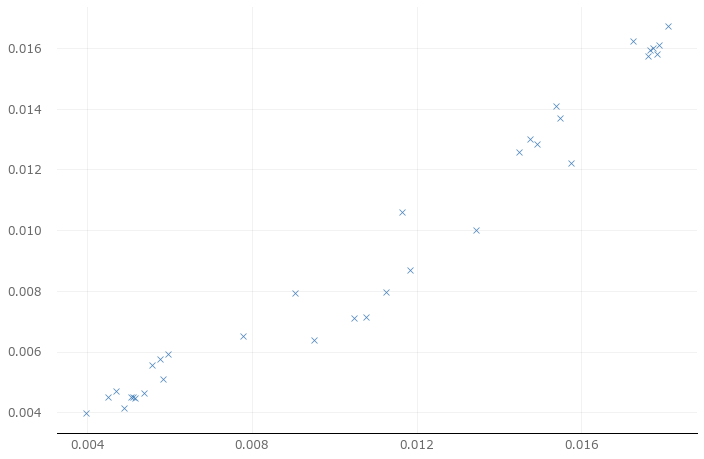

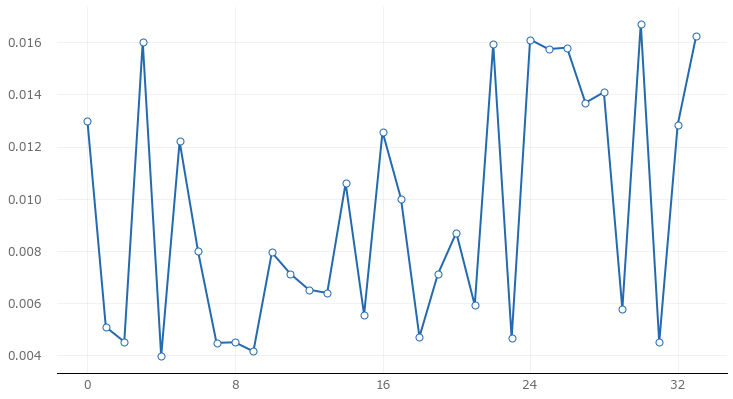

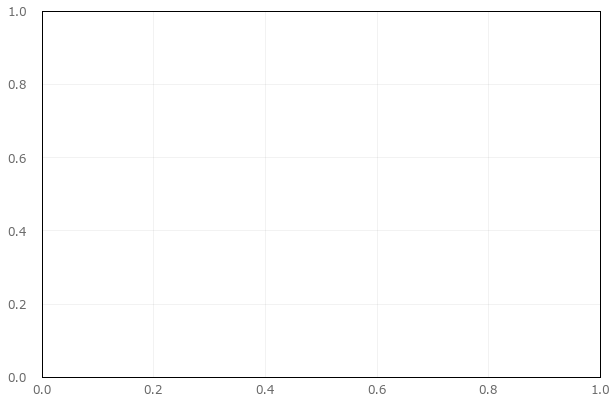

In [31]:
# # a regression plot for two dimensions 
# analyze_object.plot_regs('loss', 'val_loss')

# # line plot
# analyze_object.plot_line('val_loss')

# # up to two dimensional kernel density estimator
# analyze_object.plot_kde('val_loss')

# # a simple histogram
# analyze_object.plot_hist('val_loss', bins=50)

# # heatmap correlation
# analyze_object.plot_corr('val_loss', ['loss', 'val_loss'])

# # a four dimensional bar grid
# analyze_object.plot_bars('batch_size', 'val_loss', 'first_neuron', 'lr')